# Task 2 - Seed Shape Analysis

## Source Data Loading

In [54]:
# Load necessary libraries
from pandas.plotting import scatter_matrix  # For creating scatter plots of multiple features
from sklearn.cluster import KMeans  # For KMeans clustering
from sklearn.mixture import GaussianMixture  # For Gaussian Mixture Model (GMM) clustering
from sklearn.metrics import silhouette_score  # For calculating silhouette score
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.decomposition import PCA  # For Principal Component Analysis (PCA)
from sklearn.metrics import silhouette_samples, silhouette_score  # Additional silhouette score functions
from matplotlib.patches import Circle  # For creating circles in the plot as clustering_utils was having issue importing
from matplotlib.patches import Ellipse  # For creating ellipses in the plot as clustering_utils was having issue importing
from sklearn.metrics import davies_bouldin_score  # For calculating Davies-Bouldin Index
from sklearn.metrics import (rand_score,adjusted_rand_score,normalized_mutual_info_score,confusion_matrix)  # For various clustering metrics
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.svm import SVC  # For support vector machine
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score)  # For evaluating classification models
from sklearn.preprocessing import label_binarize  # For binarizing labels
from sklearn.metrics import roc_curve, auc  # For Receiver Operating Characteristic (ROC) curve
from sklearn.multiclass import OneVsRestClassifier  # For multiclass classification


In [55]:
file_path = 'seeds.csv'

# Read the CSV file into a pandas DataFrame
seeds= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(seeds.head())

    area  perimeter  compactness  length  width  asymmetry  groove_length
0  15.26      14.84        0.871   5.763  3.312      2.221          5.220
1  14.88      14.57        0.881   5.554  3.333      1.018          4.956
2  14.29      14.09        0.905   5.291  3.337      2.699          4.825
3  13.84      13.94        0.895   5.324  3.379      2.259          4.805
4  16.14      14.99        0.903   5.658  3.562      1.355          5.175


## Data Analysis and Visualization

In [56]:
# Display the dimensions of the DataFrame
print("\nNumber of rows and columns in the dataset:")
print(seeds.shape)


Number of rows and columns in the dataset:
(210, 7)


In [57]:
# Display the data types of each column
print("\nData types of each column:")
print(seeds.dtypes)


Data types of each column:
area             float64
perimeter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
groove_length    float64
dtype: object


In [58]:

# Display basic statistical details like percentile, mean, std etc. of a data frame
print("\nDescriptive statistics of the dataset:")
print(seeds.describe())


Descriptive statistics of the dataset:
             area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.871000    5.628533    3.258605   
std      2.909699    1.305959     0.023594    0.443063    0.377714   
min     10.590000   12.410000     0.808000    4.899000    2.630000   
25%     12.270000   13.450000     0.857250    5.262250    2.944000   
50%     14.355000   14.320000     0.873500    5.523500    3.237000   
75%     17.305000   15.715000     0.887750    5.979750    3.561750   
max     21.180000   17.250000     0.918000    6.675000    4.033000   

        asymmetry  groove_length  
count  210.000000     210.000000  
mean     3.700200       5.408071  
std      1.503559       0.491480  
min      0.765000       4.519000  
25%      2.561500       5.045000  
50%      3.599000       5.223000  
75%      4.768750       5.877000  
max      8.456000       6.550000  


In [59]:

# Display the number of non-NA values and datatypes for each column
print("\nInformation about the dataset:")
print(seeds.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None


In [60]:

# Display the pairwise Pearson correlation coefficients between the variables
print("\nCorrelation matrix of the dataset:")
print(seeds.corr())


Correlation matrix of the dataset:
                   area  perimeter  compactness    length     width  \
area           1.000000   0.994341     0.609032  0.949985  0.970771   
perimeter      0.994341   1.000000     0.530036  0.972422  0.944829   
compactness    0.609032   0.530036     1.000000  0.368725  0.762159   
length         0.949985   0.972422     0.368725  1.000000  0.860415   
width          0.970771   0.944829     0.762159  0.860415  1.000000   
asymmetry     -0.229572  -0.217340    -0.332585 -0.171562 -0.258036   
groove_length  0.863693   0.890784     0.227654  0.932806  0.749131   

               asymmetry  groove_length  
area           -0.229572       0.863693  
perimeter      -0.217340       0.890784  
compactness    -0.332585       0.227654  
length         -0.171562       0.932806  
width          -0.258036       0.749131  
asymmetry       1.000000      -0.011079  
groove_length  -0.011079       1.000000  


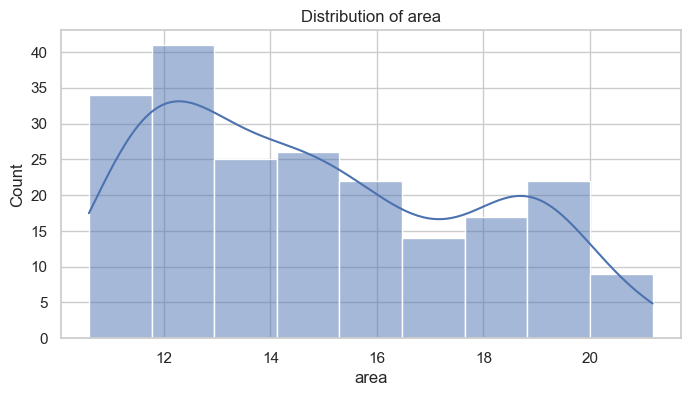

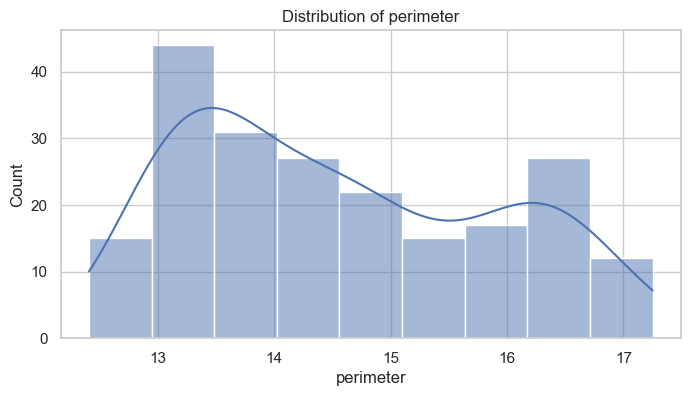

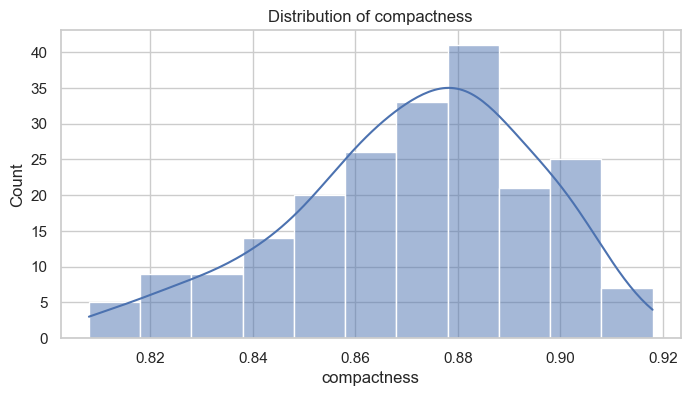

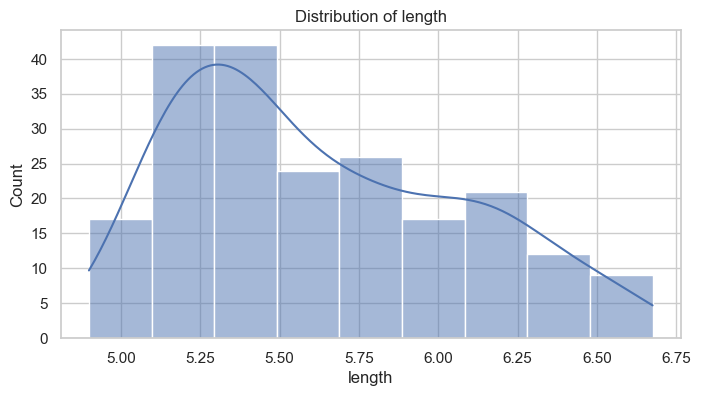

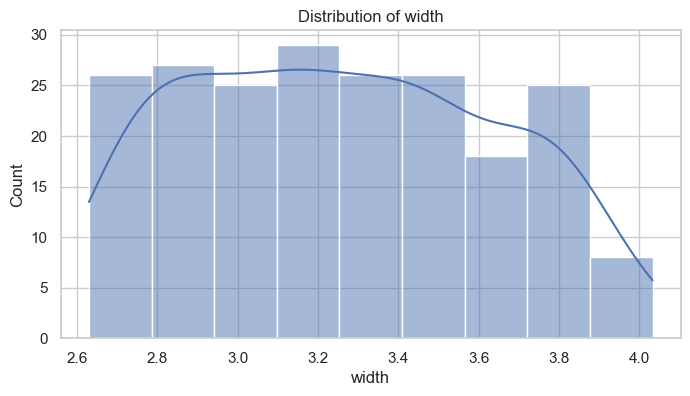

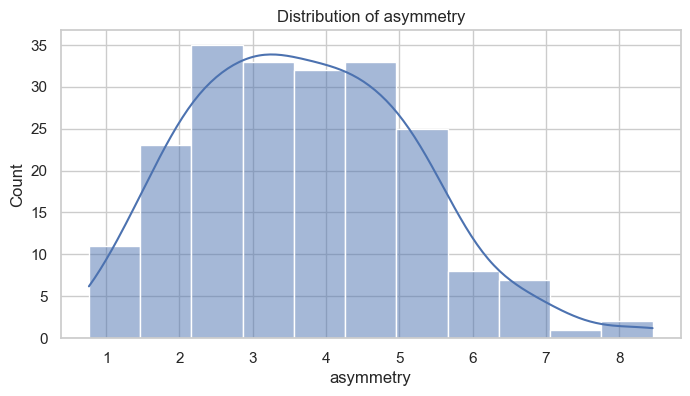

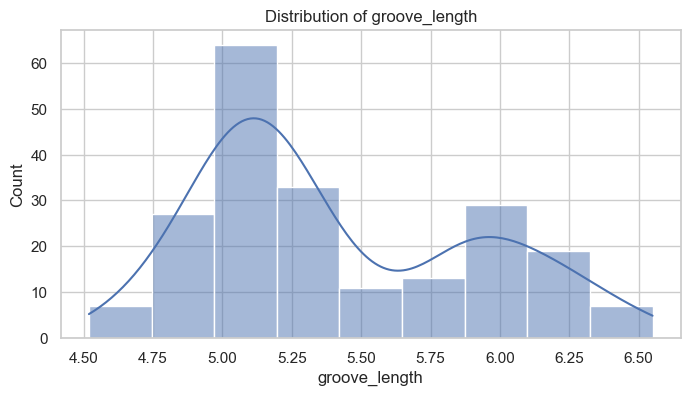

In [61]:
# Histograms for each numerical feature
for column in seeds.select_dtypes(include=['float64', 'int']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(seeds[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


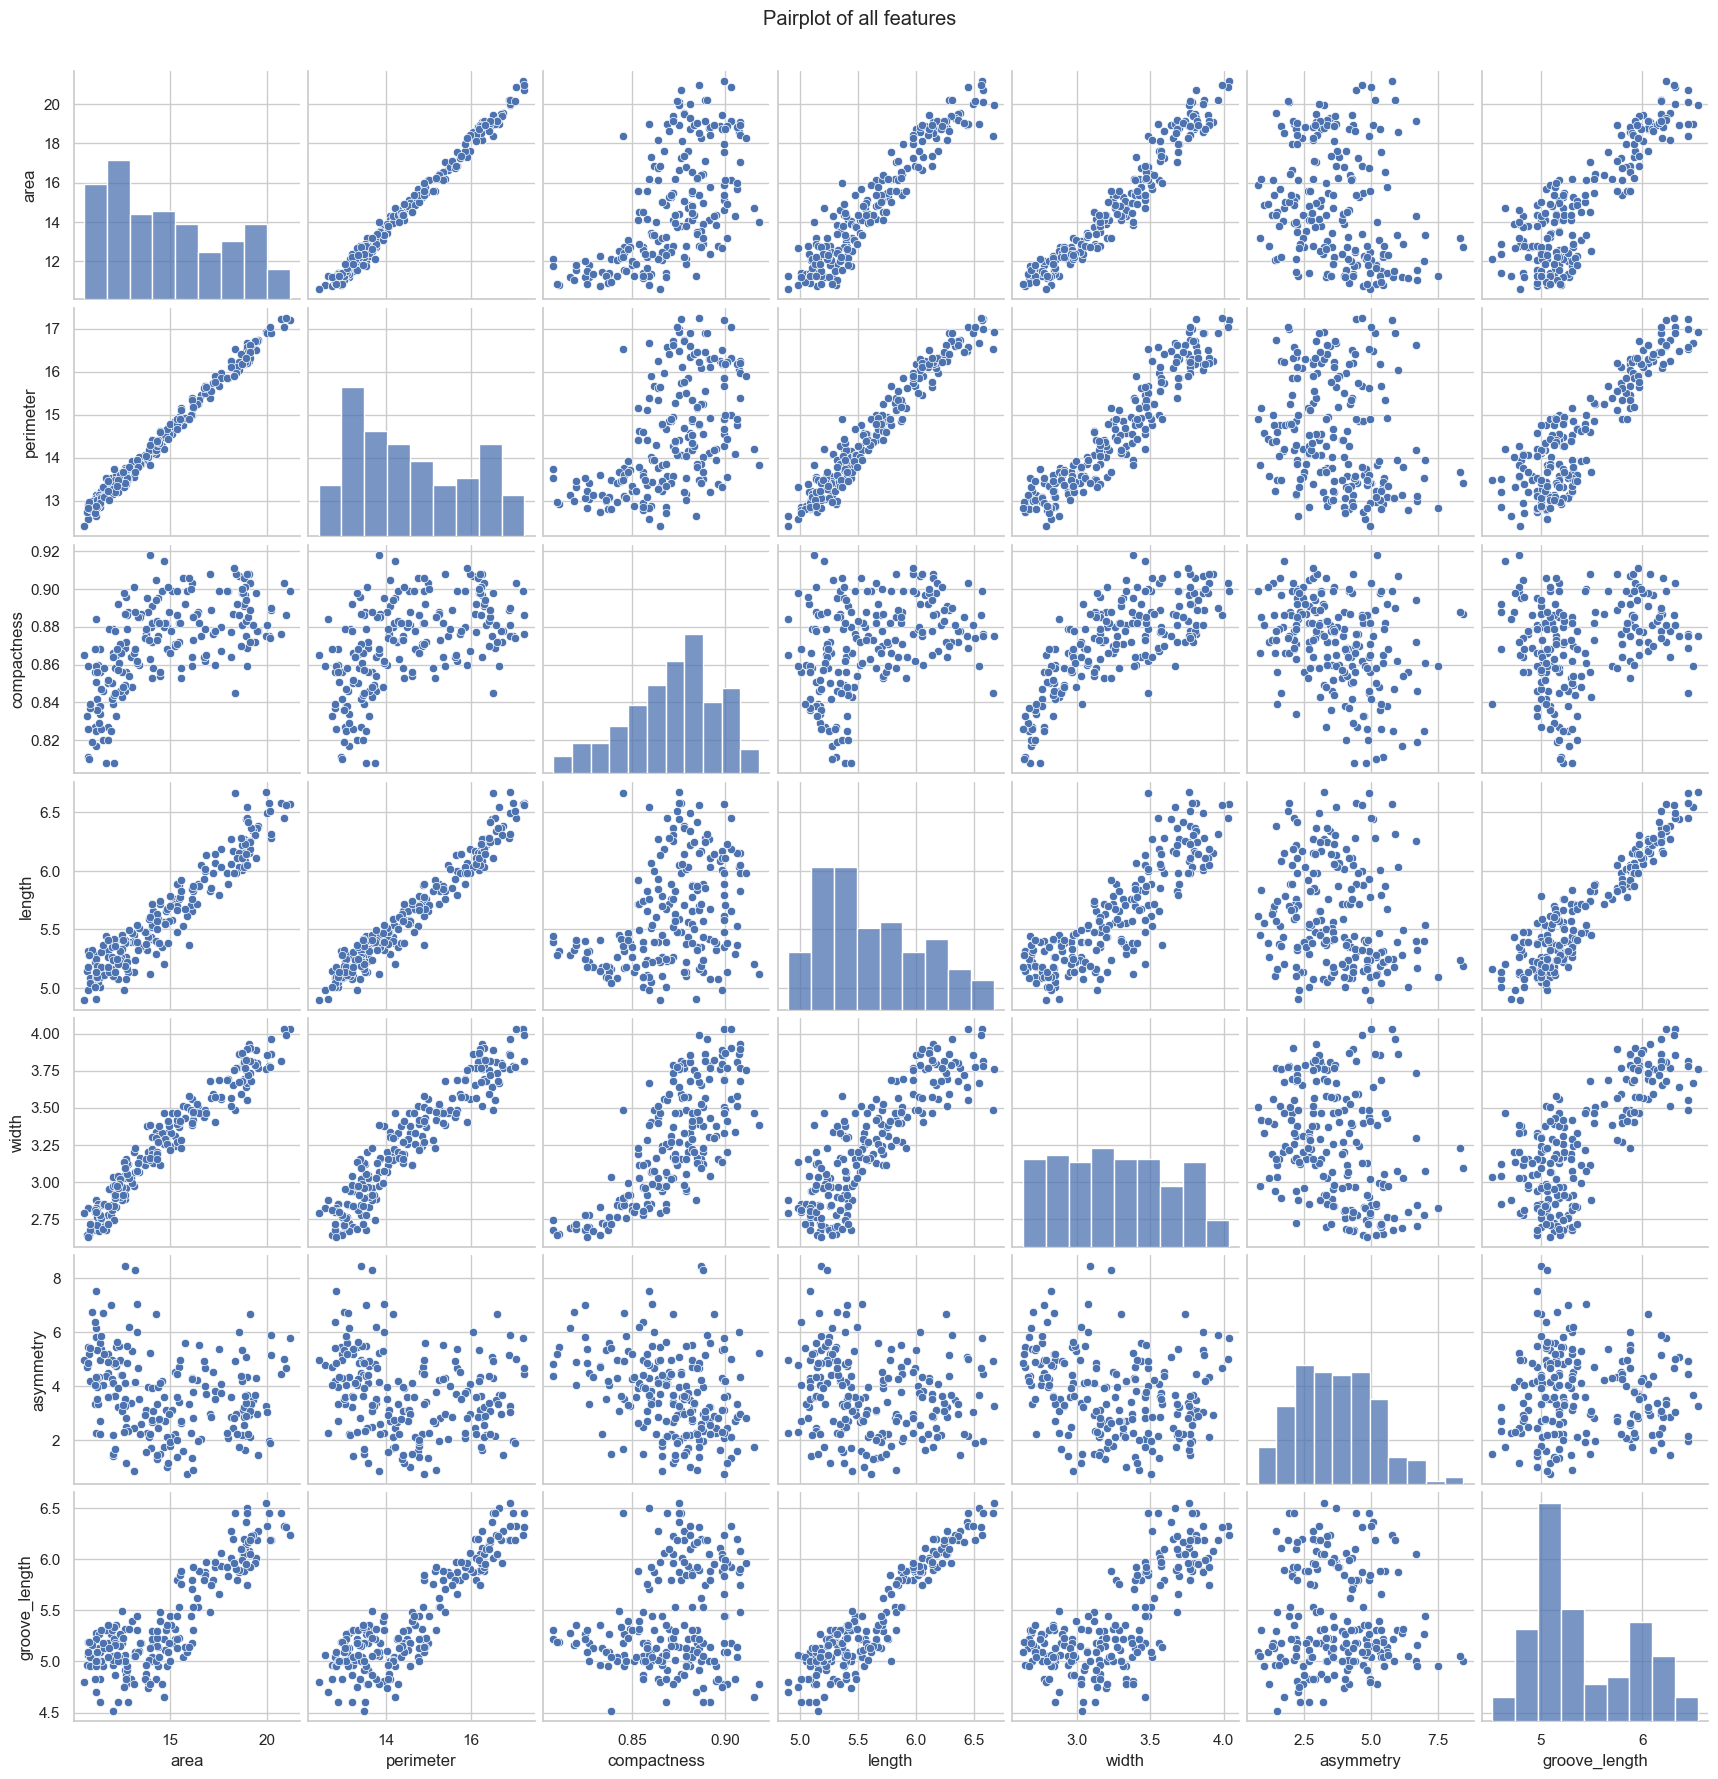

In [62]:
# Pairplot of all features
sns.pairplot(seeds)
plt.suptitle('Pairplot of all features', y=1.02)
plt.show()


#### Observation/Comments
 The pair plot offers a thorough depiction of the connections among variables in the dataset. The graph displays correlations using scatter plot in a linear pattern. Additionally, the histograms provide information about the distribution of each variable, allowing for the identification of any skewness or normalcy. By seeing the plot, it can be seen that asymmetry doesnt have a proper linear relation with rest of the fields

## Outlier Understanding

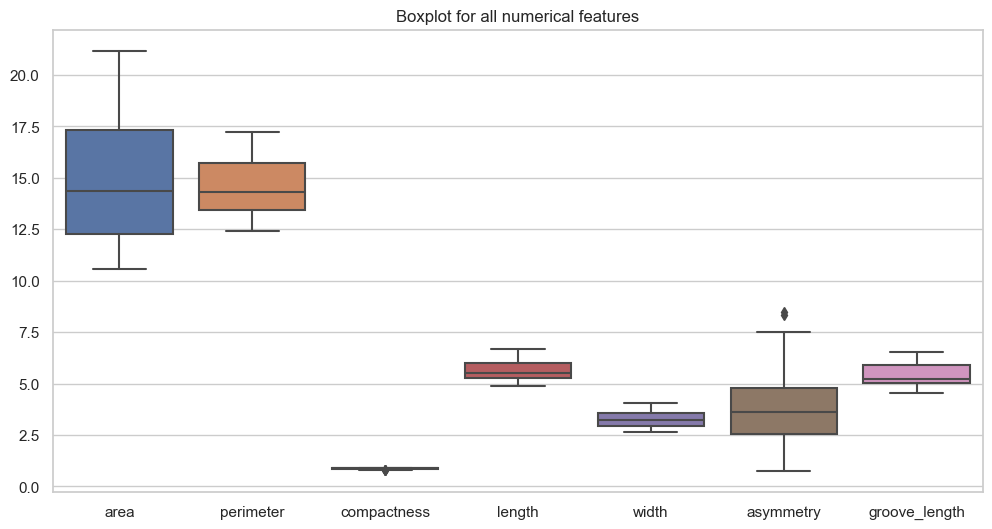

In [63]:
# Boxplot for all numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=seeds)
plt.title('Boxplot for all numerical features')
plt.show()

In [64]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = seeds['asymmetry'].quantile(0.25)
Q3 = seeds['asymmetry'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Identify outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = len(seeds[(seeds['asymmetry'] < lower_bound) | (seeds['asymmetry'] > upper_bound)])

print(f"Count of outliers in the 'asymmetry' field: {outliers_count}")

Count of outliers in the 'asymmetry' field: 2


In [65]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = seeds['compactness'].quantile(0.25)
Q3 = seeds['compactness'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Identify outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = len(seeds[(seeds['compactness'] < lower_bound) | (seeds['compactness'] > upper_bound)])

print(f"Count of outliers in the 'compactness' field: {outliers_count}")

Count of outliers in the 'compactness' field: 4


#### Observation/Comments
The presence of outliers can be found in teh field of 'asymmetry' and 'compactness'. Given the total count of data is very minimal, these outliers are left as it is without being removed

In [66]:
# Code to find missing values in the seeds DataFrame
missing_values = seeds.isnull().sum()

# Code to find duplicate values in the seeds DataFrame
duplicate_values = seeds.duplicated().sum()

# Print the results
print("Missing values in each column:\n", missing_values)
print("Number of duplicate rows:", duplicate_values)


Missing values in each column:
 area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
dtype: int64
Number of duplicate rows: 0


## Possible Feature selection using Correlation Matrix

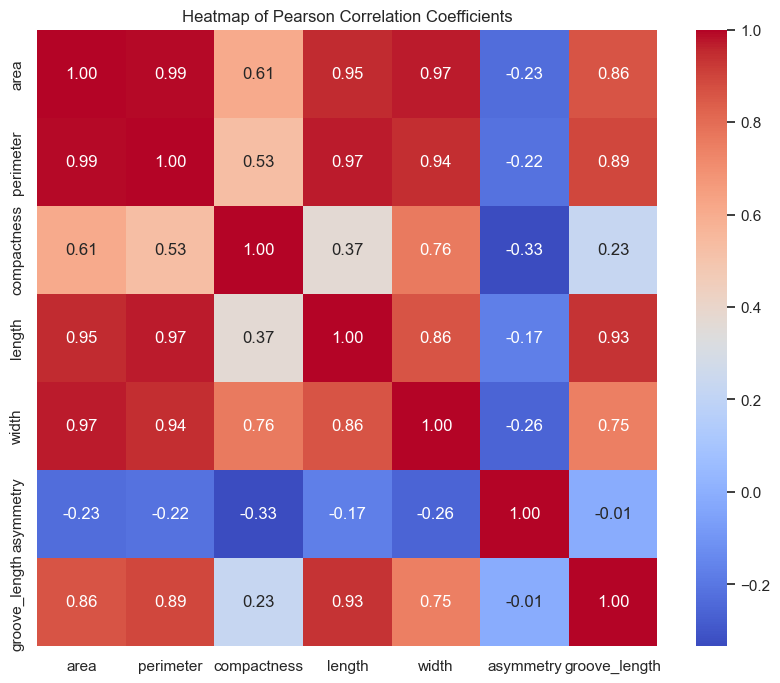

In [67]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(seeds.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation Coefficients')
plt.show()


In [68]:
# Set a correlation threshold
correlation_threshold = 0.7
correlation_matrix = seeds.corr()
# Find highly correlated features
highly_correlated_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1.0)

# Select features to keep
features_to_keep = set()
for feature in highly_correlated_pairs.columns:
    correlated_features = list(highly_correlated_pairs.index[highly_correlated_pairs[feature]])
    if correlated_features:
        features_to_keep.add(feature)

# Subset your DataFrame with the selected features
df_selected_features = seeds[features_to_keep]
df_selected_features


area  length  groove_length  width  perimeter  compactness
0    15.26   5.763          5.220  3.312      14.84        0.871
1    14.88   5.554          4.956  3.333      14.57        0.881
2    14.29   5.291          4.825  3.337      14.09        0.905
3    13.84   5.324          4.805  3.379      13.94        0.895
4    16.14   5.658          5.175  3.562      14.99        0.903
..     ...     ...            ...    ...        ...          ...
205  12.19   5.137          4.870  2.981      13.20        0.878
206  11.23   5.140          5.003  2.795      12.88        0.851
207  13.20   5.236          5.056  3.232      13.66        0.888
208  11.84   5.175          5.044  2.836      13.21        0.852
209  12.30   5.243          5.063  2.974      13.34        0.868

[210 rows x 6 columns]

* As visualized using pair-plot, assymetry appears to have lesser correlation with rest of the field. This can be used for Features to see if optimal results are obtained 

## Primary Model Implementation

### Implemenatation of Grouping methods - Clustering

#### Clustering Method
Given the dataset consists solely of numeric, non-null, float fields without pre-existing labels, clustering emerges as an apt method for uncovering natural groupings within the data. This unsupervised learning task does not depend on labeled outcomes, but instead, it detects patterns and structures that are inherent in the data itself.
* K-Means method
* GMM method

#### 1. K-Means method
The K-means algorithm was chosen due to its simplicity and efficiency, particularly when the clusters are assumed to be spherical and isotropic, aligning with the typical human tendency to group objects based on their closeness in feature space. The appeal of clustering also arises from the simplicity of interpreting its results, which are in line with intuitive understandings of grouping.

#### 2. Gaussian Mixture Models method
The selection of Gaussian Mixture Models (GMM) was based on their probabilistic characteristics, which provide a more detailed comprehension of cluster membership. This is particularly advantageous in situations where the true forms of clusters are not spherical or the clusters exhibit different sizes. Gaussian Mixture Models (GMMs) provide a versatile method by incorporating the likelihood of cluster assignment and can represent the data as a combination of many Gaussian distributions, thereby revealing information about the uncertainty surrounding cluster borders(Wang and Jiang, 2021).


Extract all the Features and do a random clsuter number selection to clsuter using Kmeans and GMM and visualize the pair plot

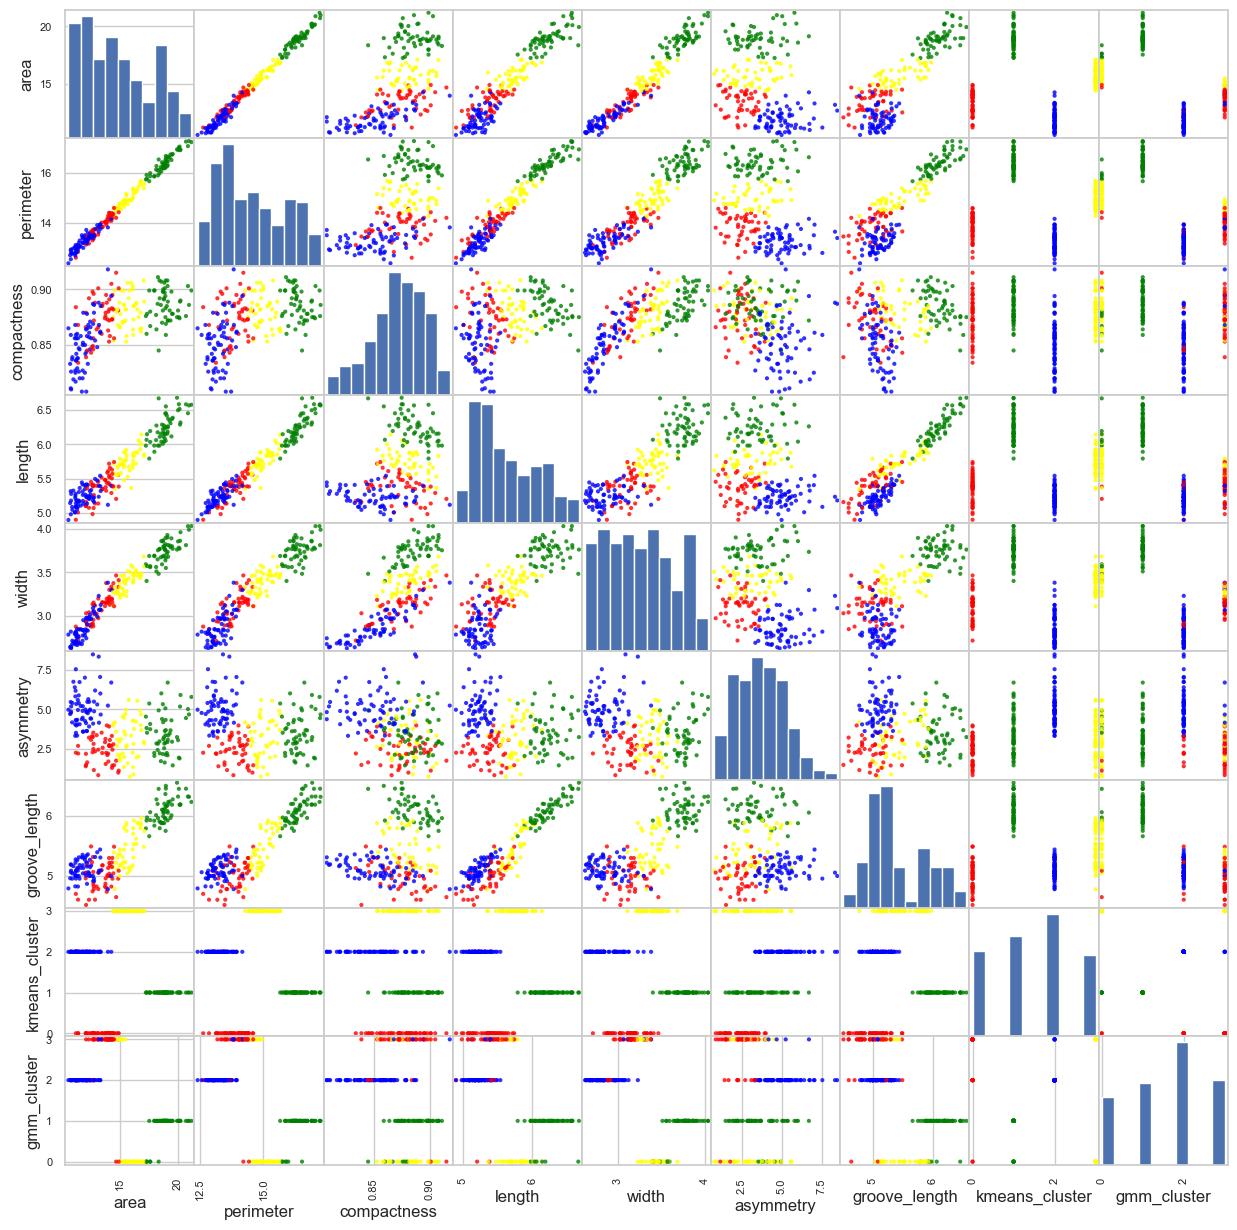

In [69]:
# Extract the features for clustering
X = seeds[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']]

# Create the clustering models
kmeans = KMeans(n_clusters=4)
gmm = GaussianMixture(n_components=4)

# Train the models on our dataset
kmeans.fit(X)
gmm.fit(X)

# Predict cluster "labels" with the trained models
y_kmeans = kmeans.predict(X)
y_gmm = gmm.predict(X)

 # Add cluster labels to the original DataFrame
seeds['kmeans_cluster'] = y_kmeans
seeds['gmm_cluster'] = y_gmm

# Define a colormap for clusters
colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}  

# Create a scatter matrix with different colors for each cluster
scatter_matrix(seeds[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'kmeans_cluster', 'gmm_cluster']],
               alpha=0.8, figsize=(15, 15), diagonal='hist', color=[colormap[i] for i in seeds['kmeans_cluster']])

plt.show()

## Clustering Evaluation

#### Silhoutte Score

The silhouette score is a reliable metric used to evaluate the suitability of cluster assignments in clustering approaches like K-means and Gaussian Mixture Models (GMM). The silhouette score assesses the clarity of cluster definitions by comparing the similarity of an instance to its own cluster relative to other clusters.

The silhouette coefficient is subsequently calculated, resulting in a numerical value ranging from -1 to 1. A score approaching +1 implies that the instance is accurately positioned within its own cluster and distant from other clusters, which is favorable. A value in proximity to 0 indicates that the instance is near a decision border separating two clusters, whereas a value near -1 may signify that the instance has been incorrectly assigned to a cluster.

The silhouette score has a significant benefit in guiding the determination of the number of clusters 'k' in K-means. It offers a distinct criterion for optimality that takes into account both the tightness and separation of the clusters. The silhouette score is highly advantageous as it does not necessitate the knowledge of true labels. Instead, it evaluates the structure that the model has discovered within the data. 


#### Silhoutte Score calculation on regular unscaled data inclusive of all Features

In [70]:
# Calculate silhouette score for KMeans
silhouette_kmeans = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.2f}")

# Calculate silhouette score for GMM
silhouette_gmm = silhouette_score(X, y_gmm)
print(f"Silhouette Score for GMM: {silhouette_gmm:.2f}")


Silhouette Score for KMeans: 0.40
Silhouette Score for GMM: 0.35


#### Silhoutte Score calculation on standardized data inclusive of all Features

In [71]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create the clustering models
kmeans = KMeans(n_clusters=4)
gmm = GaussianMixture(n_components=4)

# Train the models on the standardized dataset
kmeans.fit(X_standardized)
gmm.fit(X_standardized)

# Predict cluster "labels" with the trained models
y_kmeans = kmeans.predict(X_standardized)
y_gmm = gmm.predict(X_standardized)

# Add cluster labels to the original DataFrame
seeds['kmeans_cluster_standardized'] = y_kmeans
seeds['gmm_cluster_standardized'] = y_gmm

# Calculate silhouette score for KMeans on standardized data
silhouette_kmeans_standardized = silhouette_score(X_standardized, y_kmeans)
print(f"Silhouette Score for KMeans on standardized data: {silhouette_kmeans_standardized:.2f}")

# Calculate silhouette score for GMM on standardized data
silhouette_gmm_standardized = silhouette_score(X_standardized, y_gmm)
print(f"Silhouette Score for GMM on standardized data: {silhouette_gmm_standardized:.2f}")



Silhouette Score for KMeans on standardized data: 0.33
Silhouette Score for GMM on standardized data: 0.27


#### Silhoutte Score calculation on PCA transformed data that has been standardized

In [72]:

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create the clustering models
kmeans = KMeans(n_clusters=4)
gmm = GaussianMixture(n_components=4)

# Train the models on the PCA-transformed dataset
kmeans.fit(X_pca)
gmm.fit(X_pca)

# Predict cluster "labels" with the trained models
y_kmeans = kmeans.predict(X_pca)
y_gmm = gmm.predict(X_pca)

 # Add cluster labels to the original DataFrame
seeds['kmeans_cluster_pca'] = y_kmeans
seeds['gmm_cluster_pca'] = y_gmm

# Calculate silhouette score for KMeans on PCA-transformed data
silhouette_kmeans_pca = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score for KMeans on PCA-transformed data: {silhouette_kmeans_pca:.2f}")

# Calculate silhouette score for GMM on PCA-transformed data
silhouette_gmm_pca = silhouette_score(X_pca, y_gmm)
print(f"Silhouette Score for GMM on PCA-transformed data: {silhouette_gmm_pca:.2f}")


Silhouette Score for KMeans on PCA-transformed data: 0.44
Silhouette Score for GMM on PCA-transformed data: 0.44


### Clustering Analysis on all features

After examining the above analysis, it is evident that standardized data transformed through Principal Component Analysis (PCA) yields improved results. Consequently, to ascertain the optimal number of clusters, a range of K values from 2 to 6 are iteratively tested, with each K's corresponding silhouette score being compared for both clustering methods.

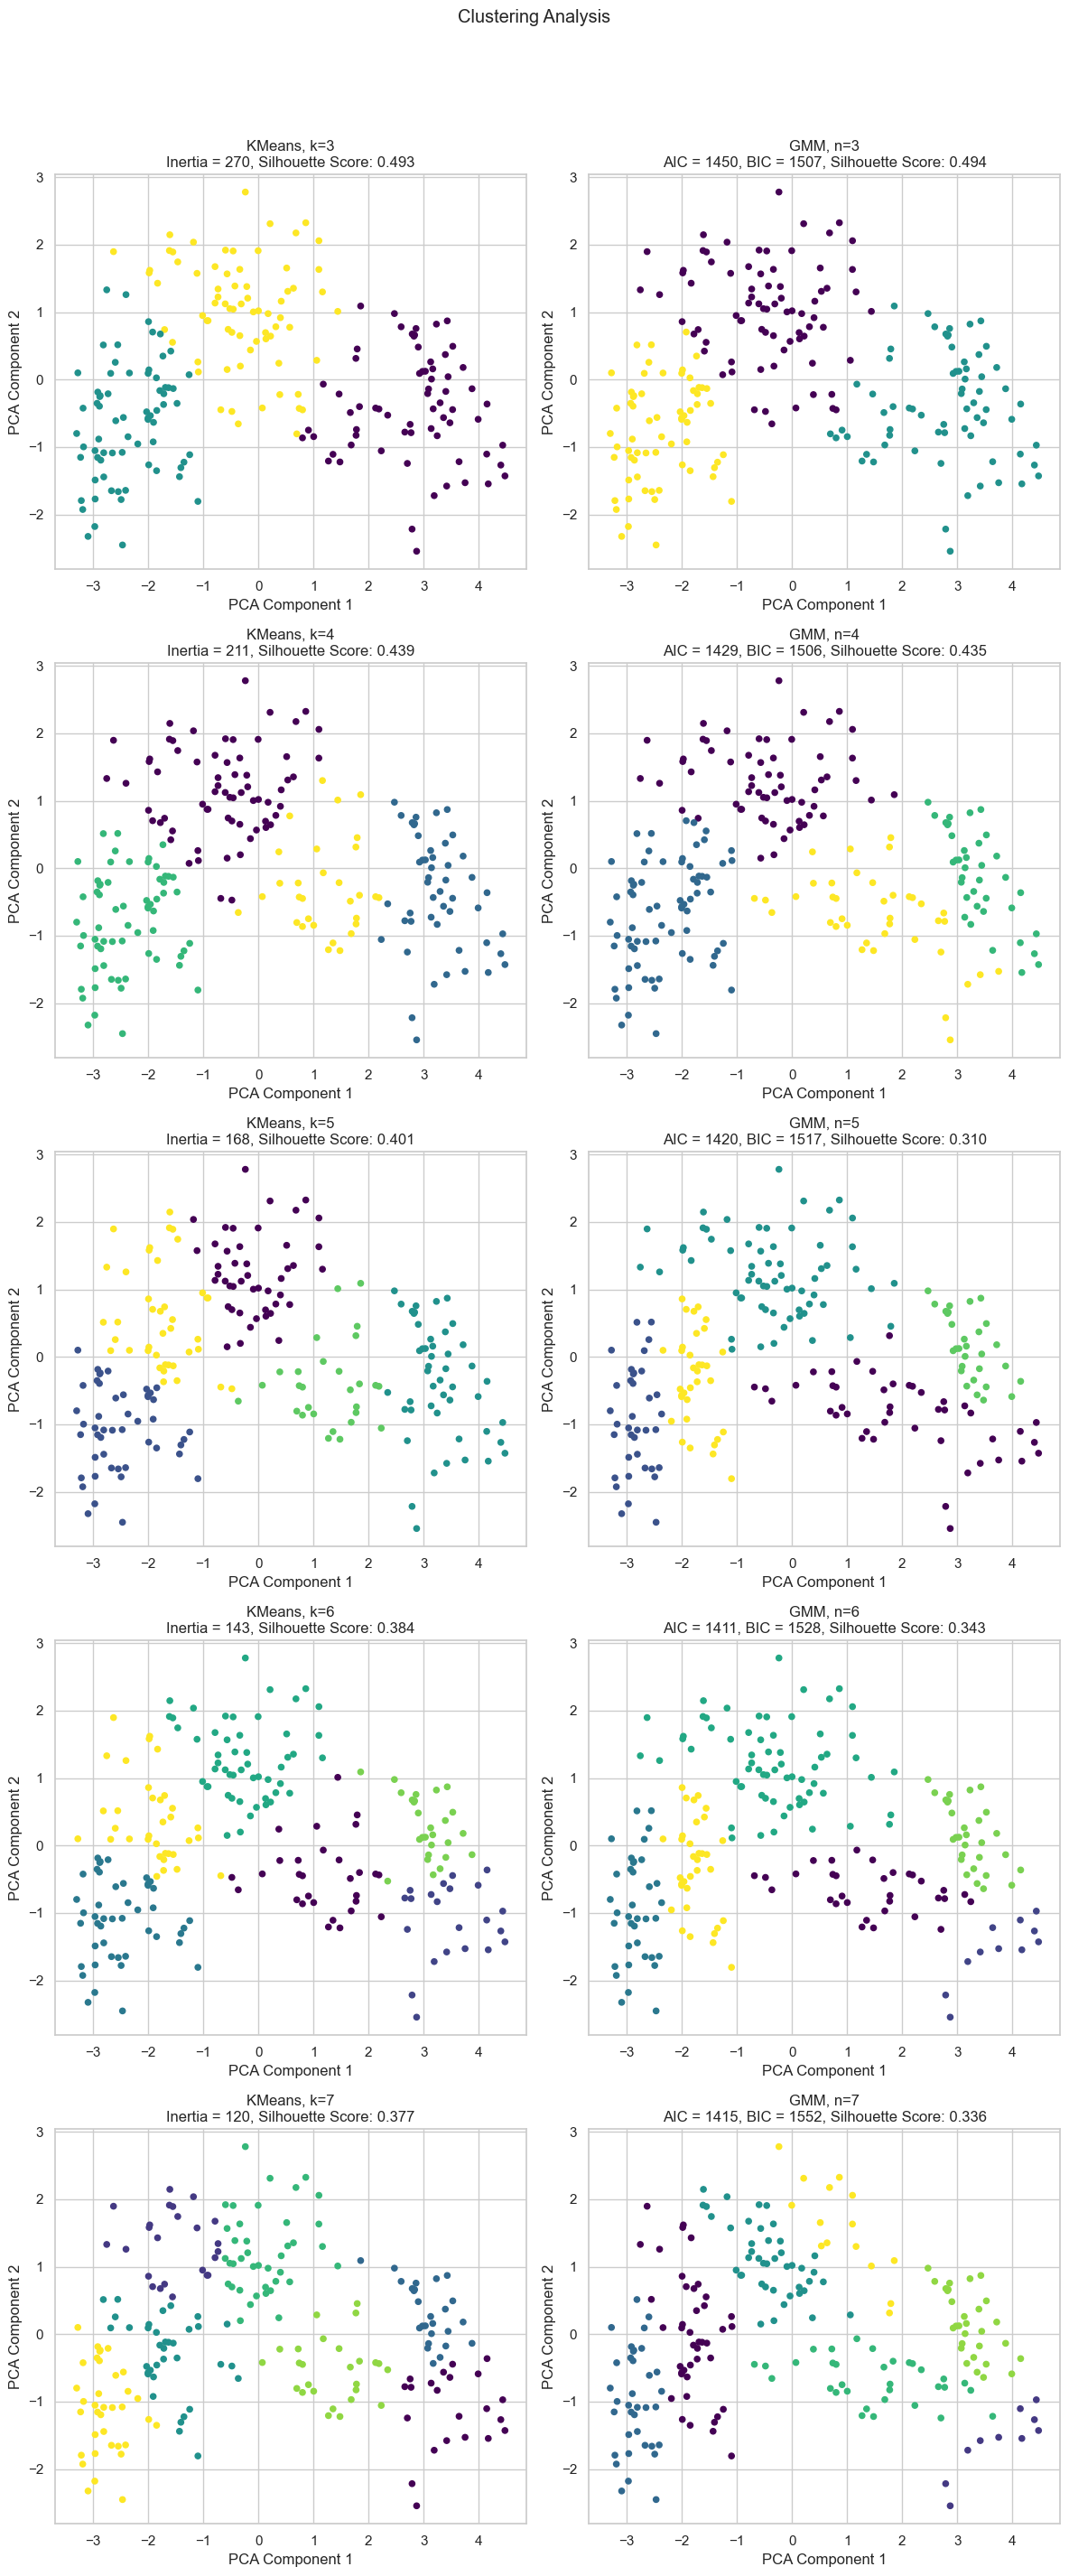

In [73]:
# Define the number of clusters to analyze
cluster_numbers = np.arange(3, 8)

# Create subplots with enough rows to plot the results for each cluster number
rows_required = len(cluster_numbers)
fig, ax = plt.subplots(rows_required, 2, figsize=(12, rows_required * 6))  
fig.suptitle('Clustering Analysis')

for n_clusters in cluster_numbers:
    inst = n_clusters - 3  # Adjust for zero indexing
    
    # Create KMeans model and calculate metrics
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=300)
    kmeans.fit(X_pca)
    y_kmeans = kmeans.predict(X_pca)
    inertia = kmeans.inertia_
    silhouette_kmeans = silhouette_score(X_pca, y_kmeans)

    # Create GMM model and calculate metrics
    gmm = GaussianMixture(n_components=n_clusters, n_init=20, random_state=300, init_params='kmeans')
    gmm.fit(X_pca)
    y_gmm = gmm.predict(X_pca)
    aic = gmm.aic(X_pca)
    bic = gmm.bic(X_pca)
    silhouette_gmm = silhouette_score(X_pca, y_gmm)

    # Plot KMeans
    ax[inst, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=20, cmap='viridis')
    ax[inst, 0].set_title(f'KMeans, k={n_clusters}\nInertia = {inertia:.0f}, Silhouette Score: {silhouette_kmeans:.3f}')
    ax[inst, 0].set_xlabel('PCA Component 1')  # X-axis label
    ax[inst, 0].set_ylabel('PCA Component 2')  # Y-axis label

    # Plot GMM
    ax[inst, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, s=20, cmap='viridis')
    ax[inst, 1].set_title(f'GMM, n={n_clusters}\nAIC = {aic:.0f}, BIC = {bic:.0f}, Silhouette Score: {silhouette_gmm:.3f}')
    ax[inst, 1].set_xlabel('PCA Component 1')  # X-axis label
    ax[inst, 1].set_ylabel('PCA Component 2')  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

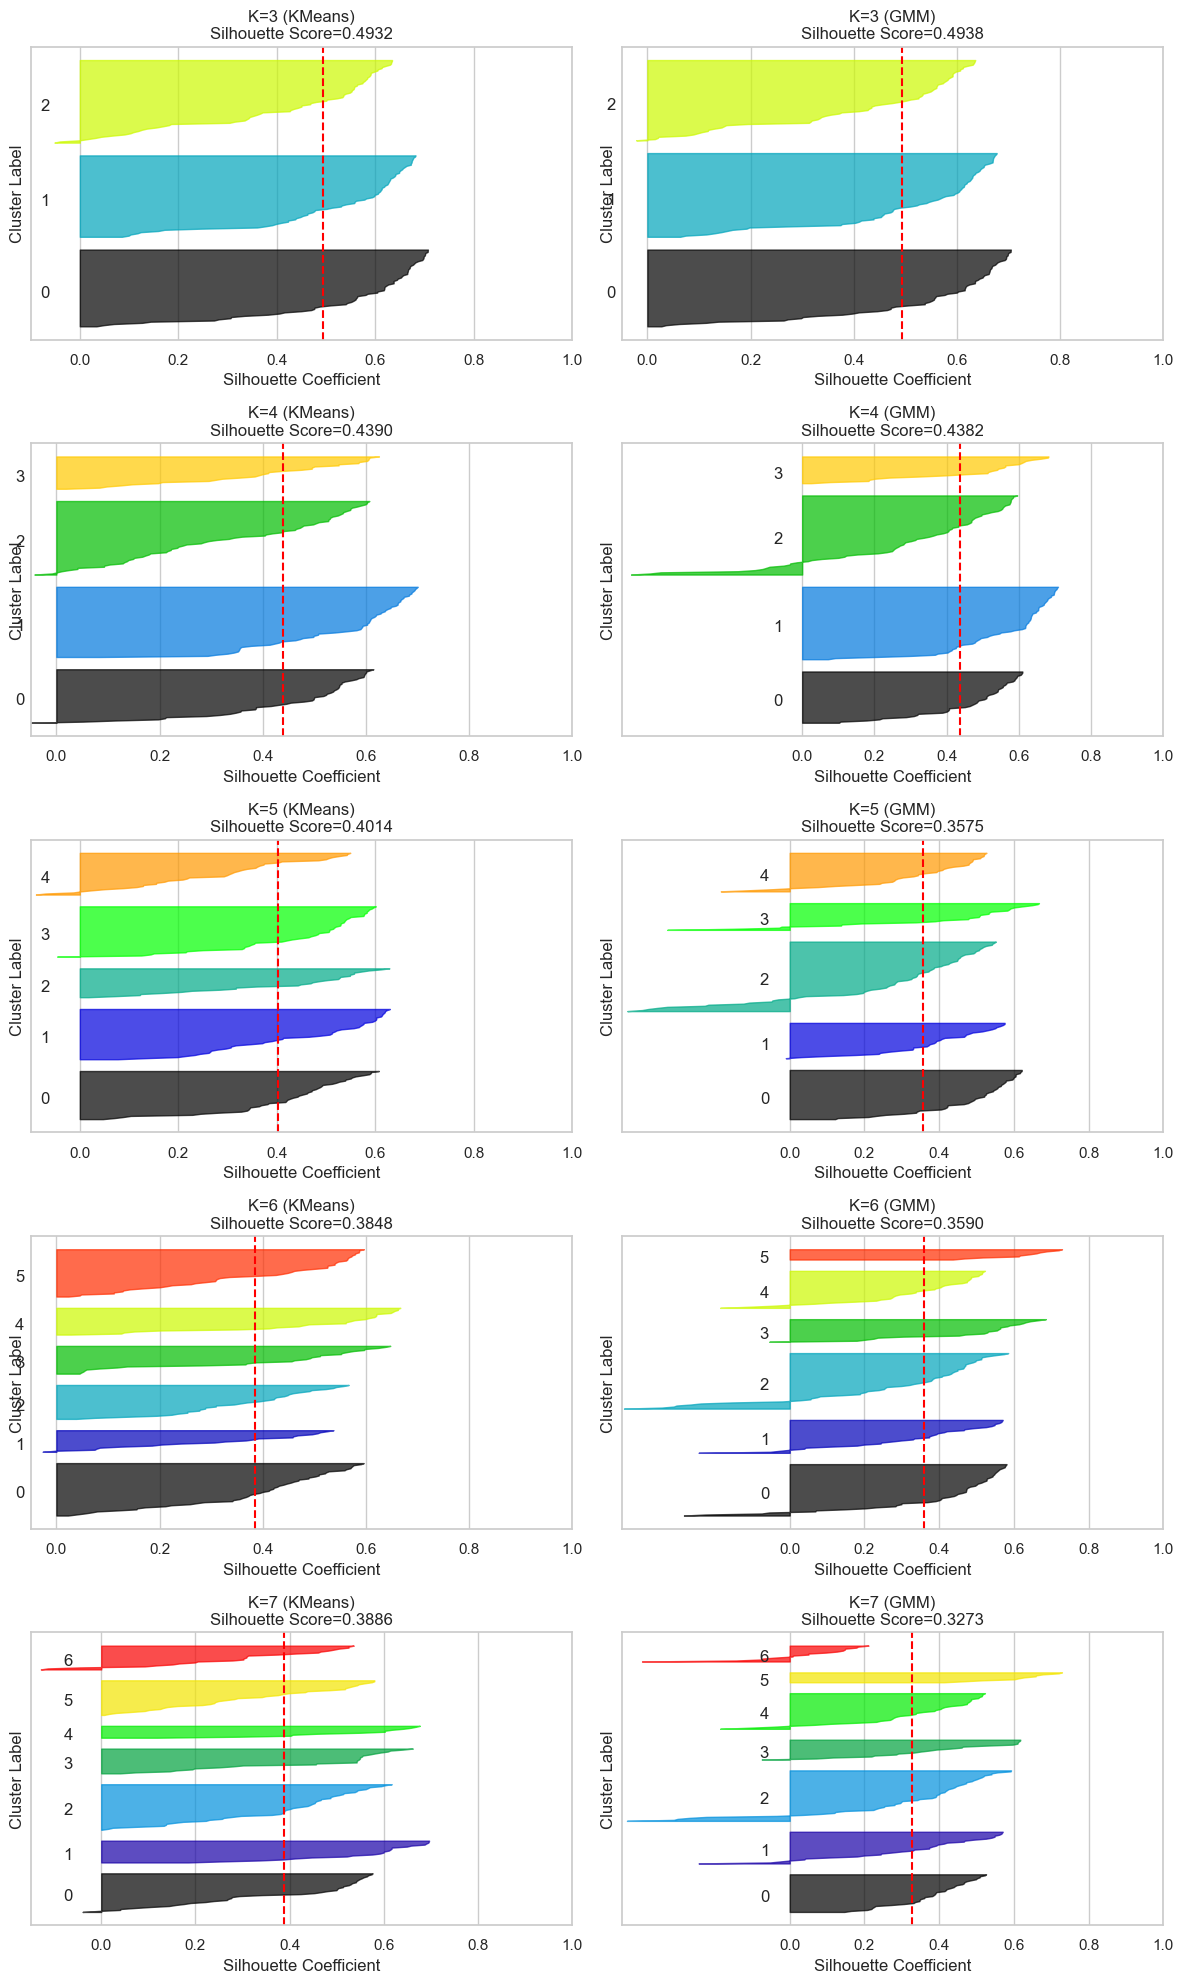

In [74]:
# Range of the different values of K to analyze
cluster_numbers = range(3, 8) 

# Create subplots
fig, axs = plt.subplots(len(cluster_numbers), 2, figsize=(12, 4 * len(cluster_numbers)))

# Ensure axs is a 2D array
if len(cluster_numbers) == 1:
    axs = np.expand_dims(axs, axis=0)

# Adding x and y axis names
for ax in axs[-1]:
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')

for k, (ax_kmeans, ax_gmm) in zip(cluster_numbers, axs):
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Create GMM model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)

    # Predict cluster "labels" with the trained models
    y_kmeans = kmeans.predict(X_pca)
    y_gmm = gmm.predict(X_pca)

    # Calculate silhouette samples and average silhouette score for KMeans
    values_kmeans = silhouette_samples(X_pca, y_kmeans)
    silhouette_avg_kmeans = silhouette_score(X_pca, y_kmeans)

    # Plot silhouette samples for KMeans
    y_lower = 10
    for i in range(k):
        ith_values = values_kmeans[y_kmeans == i]
        ith_values.sort()

        szi = ith_values.shape[0]
        y_upper = y_lower + szi

        color = plt.cm.nipy_spectral(float(i) / k)

        ax_kmeans.fill_betweenx(np.arange(y_lower, y_upper),
                                0,
                                ith_values,
                                facecolor=color,
                                edgecolor=color,
                                alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax_kmeans.text(-0.08, y_lower + 0.5 * szi - 8, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax_kmeans.set_title(f'K={k} (KMeans)\nSilhouette Score={silhouette_avg_kmeans:.4f}')
    ax_kmeans.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")

    # Clean axis labels
    ax_kmeans.set_yticks([])  # Clear the y-axis labels / ticks
    ax_kmeans.set_xlim(left=np.floor(min(values_kmeans) * 2 * 10) / 2 / 10)
    ax_kmeans.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling axes
    ax_kmeans.set_xlabel('Silhouette Coefficient')
    ax_kmeans.set_ylabel('Cluster Label')

    # Calculate silhouette samples and average silhouette score for GMM
    values_gmm = silhouette_samples(X_pca, y_gmm)
    silhouette_avg_gmm = silhouette_score(X_pca, y_gmm)

    # Plot silhouette samples for GMM
    y_lower = 10
    for i in range(k):
        ith_values = values_gmm[y_gmm == i]
        ith_values.sort()

        szi = ith_values.shape[0]
        y_upper = y_lower + szi

        color = plt.cm.nipy_spectral(float(i) / k)

        ax_gmm.fill_betweenx(np.arange(y_lower, y_upper),
                             0,
                             ith_values,
                             facecolor=color,
                             edgecolor=color,
                             alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax_gmm.text(-0.08, y_lower + 0.5 * szi - 8, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax_gmm.set_title(f'K={k} (GMM)\nSilhouette Score={silhouette_avg_gmm:.4f}')
    ax_gmm.axvline(x=silhouette_avg_gmm, color="red", linestyle="--")

    # Clean axis labels
    ax_gmm.set_yticks([])  # Clear the y-axis labels / ticks
    ax_gmm.set_xlim(left=np.floor(min(values_gmm) * 2 * 10) / 2 / 10)
    ax_gmm.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling axes
    ax_gmm.set_xlabel('Silhouette Coefficient')
    ax_gmm.set_ylabel('Cluster Label')

plt.tight_layout()
plt.show()


#### Observation/Comments
Based on above visualization, statistical input and analysis, it can be inferred that number of cluster chosen as 3 would be a better fit as it gives more silhoutte score

### Clustering analysis on Feature selected fields

Now, similar process of standardization and PCA transformation is applied on top of selected Features. These featrues were selected as a part of correlation matrix by filtering records with minumin threshold of 70%.
Ideal silhoutte score is found by looping through clusters from 3 to 8

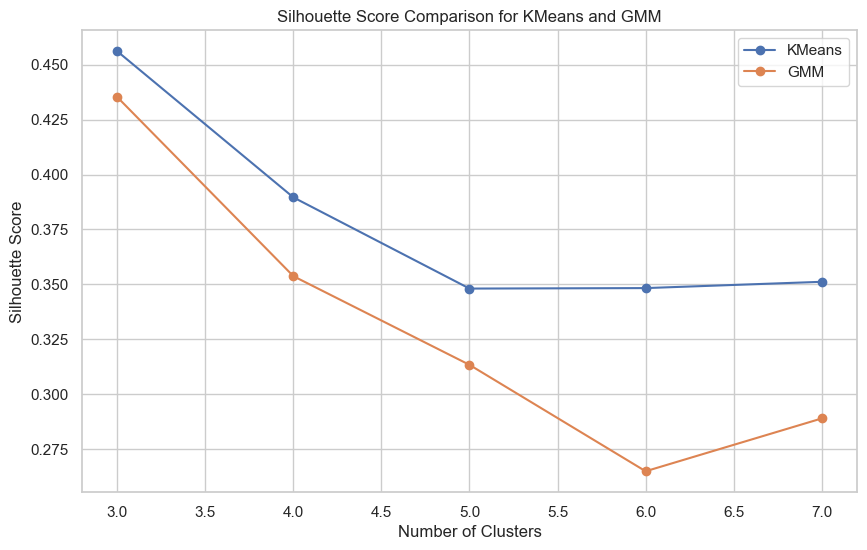

In [75]:

# Append the selected fields to X_selected
# Select features
selected_features = ['area', 'perimeter', 'compactness', 'length', 'width', 'groove_length']
X_selected = seeds[selected_features]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Range of clusters to analyze
cluster_range = range(3, 8)

# Lists to store silhouette scores
kmeans_silhouette_scores = []
gmm_silhouette_scores = []

# Iterate over different cluster numbers
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_standardized)
    kmeans_silhouette = silhouette_score(X_standardized, kmeans_labels)
    kmeans_silhouette_scores.append(kmeans_silhouette)

    # GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_standardized)
    gmm_silhouette = silhouette_score(X_standardized, gmm_labels)
    gmm_silhouette_scores.append(gmm_silhouette)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, kmeans_silhouette_scores, marker='o', label='KMeans')
plt.plot(cluster_range, gmm_silhouette_scores, marker='o', label='GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison for KMeans and GMM')
plt.legend()
plt.show()

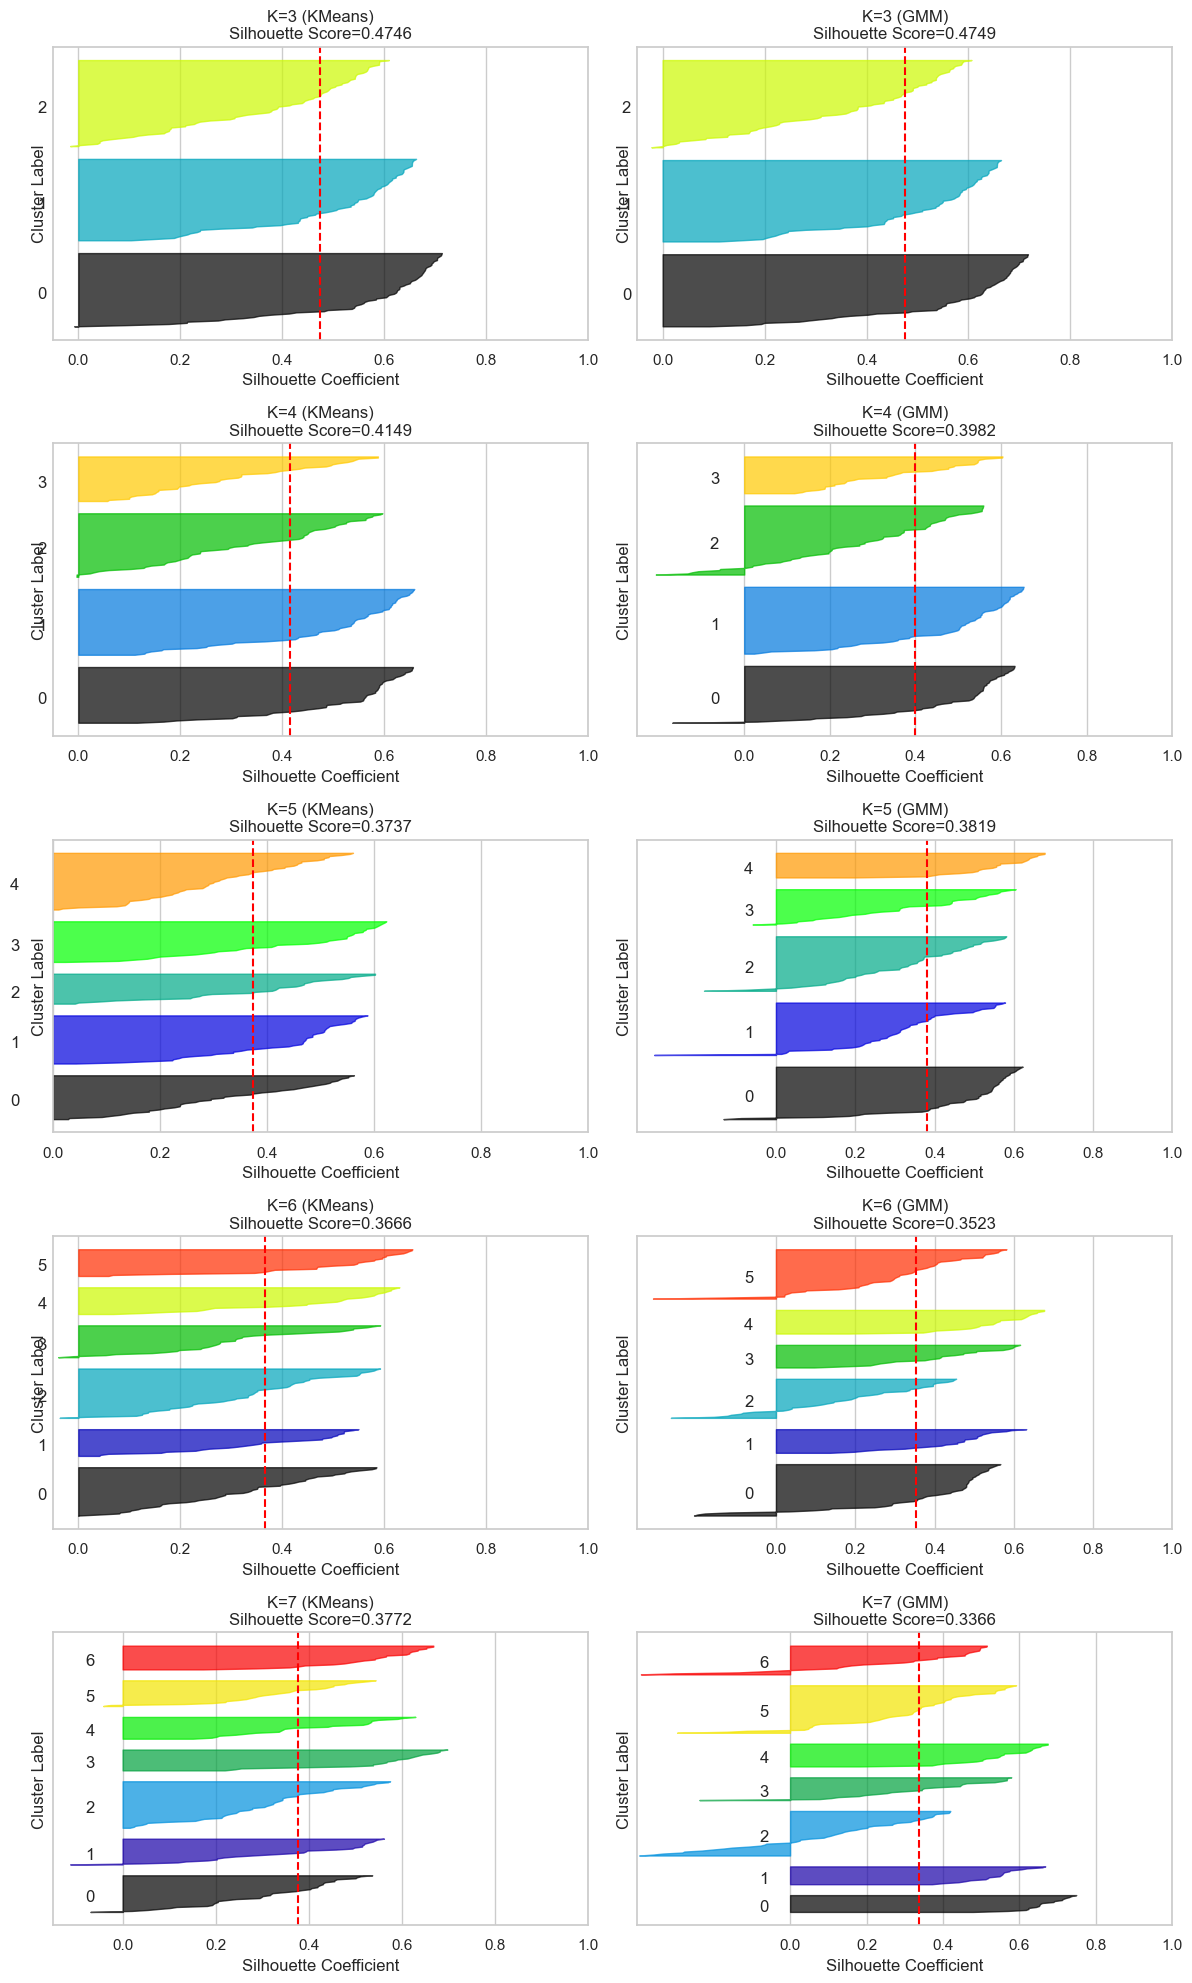

In [76]:
# Select features
selected_features = ['area', 'perimeter', 'compactness', 'length', 'width', 'groove_length']
X_selected = seeds[selected_features]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Range of the different values of K to analyze
cluster_numbers = range(3, 8) 

# Create subplots
fig, axs = plt.subplots(len(cluster_numbers), 2, figsize=(12, 4 * len(cluster_numbers)))

# Ensure axs is a 2D array
if len(cluster_numbers) == 1:
    axs = np.expand_dims(axs, axis=0)

# Adding x and y axis names
for ax in axs[-1]:
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')

for k, (ax_kmeans, ax_gmm) in zip(cluster_numbers, axs):
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Create GMM model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)

    # Predict cluster "labels" with the trained models
    y_kmeans = kmeans.predict(X_pca)
    y_gmm = gmm.predict(X_pca)

    # Calculate silhouette samples and average silhouette score for KMeans
    values_kmeans = silhouette_samples(X_pca, y_kmeans)
    silhouette_avg_kmeans = silhouette_score(X_pca, y_kmeans)

    # Plot silhouette samples for KMeans
    y_lower = 10
    for i in range(k):
        ith_values = values_kmeans[y_kmeans == i]
        ith_values.sort()

        szi = ith_values.shape[0]
        y_upper = y_lower + szi

        color = plt.cm.nipy_spectral(float(i) / k)

        ax_kmeans.fill_betweenx(np.arange(y_lower, y_upper),
                                0,
                                ith_values,
                                facecolor=color,
                                edgecolor=color,
                                alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax_kmeans.text(-0.08, y_lower + 0.5 * szi - 8, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax_kmeans.set_title(f'K={k} (KMeans)\nSilhouette Score={silhouette_avg_kmeans:.4f}')
    ax_kmeans.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")

    # Clean axis labels
    ax_kmeans.set_yticks([])  # Clear the y-axis labels / ticks
    ax_kmeans.set_xlim(left=np.floor(min(values_kmeans) * 2 * 10) / 2 / 10)
    ax_kmeans.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling axes
    ax_kmeans.set_xlabel('Silhouette Coefficient')
    ax_kmeans.set_ylabel('Cluster Label')

    # Calculate silhouette samples and average silhouette score for GMM
    values_gmm = silhouette_samples(X_pca, y_gmm)
    silhouette_avg_gmm = silhouette_score(X_pca, y_gmm)

    # Plot silhouette samples for GMM
    y_lower = 10
    for i in range(k):
        ith_values = values_gmm[y_gmm == i]
        ith_values.sort()

        szi = ith_values.shape[0]
        y_upper = y_lower + szi

        color = plt.cm.nipy_spectral(float(i) / k)

        ax_gmm.fill_betweenx(np.arange(y_lower, y_upper),
                             0,
                             ith_values,
                             facecolor=color,
                             edgecolor=color,
                             alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax_gmm.text(-0.08, y_lower + 0.5 * szi - 8, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax_gmm.set_title(f'K={k} (GMM)\nSilhouette Score={silhouette_avg_gmm:.4f}')
    ax_gmm.axvline(x=silhouette_avg_gmm, color="red", linestyle="--")

    # Clean axis labels
    ax_gmm.set_yticks([])  # Clear the y-axis labels / ticks
    ax_gmm.set_xlim(left=np.floor(min(values_gmm) * 2 * 10) / 2 / 10)
    ax_gmm.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling axes
    ax_gmm.set_xlabel('Silhouette Coefficient')
    ax_gmm.set_ylabel('Cluster Label')

plt.tight_layout()
plt.show()


Based on above results, it appears the feature engineered data also has similar results in comparison to silhoutte score of all features. Since, no difference is made, all the features will be considered going forward

### Calculation of Optimal Cluster value 

Below are the 2 methods selected to find optimal number of cluster
* Elbow Method
* AIC / BIC

#### Elbow Method
The Elbow method is preferred for K-means as it directly assesses the algorithm's goal of minimizing within-cluster variance, providing a visual and straightforward approach to finding the optimal number of clusters. The Elbow point, where additional clusters do not significantly decrease inertia, intuitively indicates the ideal cluster count.

#### AIC / BIC
For GMM, AIC and BIC are superior because they account for the complexity of the model, which is crucial given GMM's flexibility and the potential for overfitting. These metrics evaluate the trade-off between model fit and complexity, with BIC providing a stricter penalty for the number of parameters.

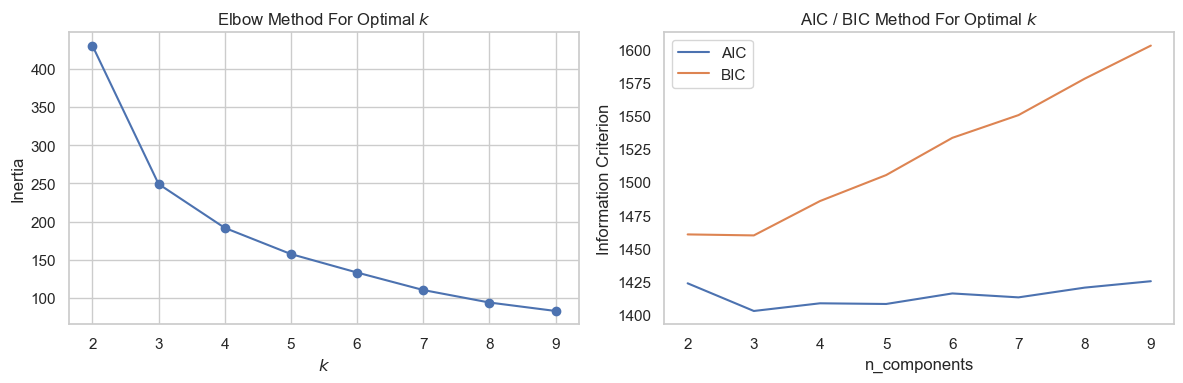

In [77]:
inertia = []
aic_values = []
bic_values = []
K = range(2, 10)

X_pca = X_pca 

# Elbow plot for KMeans
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# AIC and BIC plots for GMM
n_components = range(2, 10)
for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    aic_values.append(gmm.aic(X_pca))
    bic_values.append(gmm.bic(X_pca))

# Plotting Elbow plot for KMeans
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Elbow plot for KMeans
axs[0].plot(K, inertia, marker='o')
axs[0].set_xlabel(r'$k$')
axs[0].set_ylabel('Inertia')
axs[0].set_title(r'Elbow Method For Optimal $k$')

# AIC and BIC plots for GMM
axs[1].plot(n_components, aic_values, label='AIC')
axs[1].plot(n_components, bic_values, label='BIC')
axs[1].set_xlabel('n_components')
axs[1].set_ylabel('Information Criterion')
axs[1].set_title(r'AIC / BIC Method For Optimal $k$')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()


#### Observation/Comments
From above, it can inferred optimal cluster value is 4 as per properties of elbow method and AIC/BIC

### Implemenation of Optimal Clustering method
Based on above analysis and implemenatation, 3 is identified as optimal number of cluster, with which KMeans and GMM methods are implemented

In [78]:
features = ['compactness', 'perimeter', 'area', 'groove_length', 'width', 'asymmetry', 'length']
# X_selected = df[features]

# Standardize the selected fields
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


In [79]:

# Function to plot ellipse
def plot_ellipse(ax, mean, cov, color, label):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigenvalues)

    ellipse = Ellipse(mean, width, height, angle, color=color, alpha=0.3, label=label)
    ax.add_patch(ellipse)

Silhouette Score for GMM: 0.4749


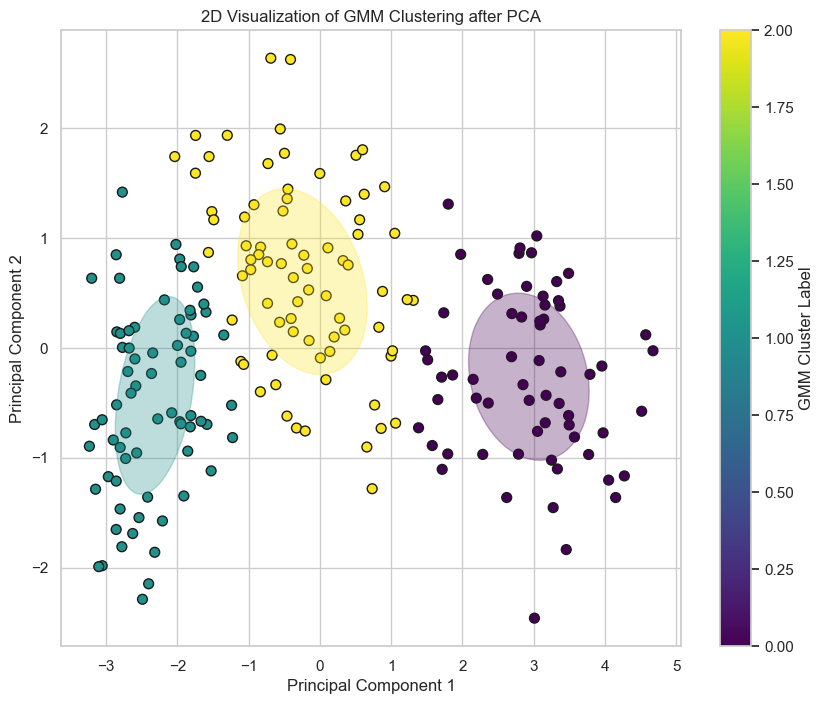

In [80]:
# Use Gaussian Mixture Model (GMM) for clustering
n_components = 3  
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Plot the 2D scatter plot
plt.figure(figsize=(10, 8))

# Plot each data point colored by its cluster label
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50, edgecolors='k')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of GMM Clustering after PCA')

# Add a colorbar to show the cluster labels
colorbar = plt.colorbar(scatter, label='GMM Cluster Label')

# Plotting fitting circles
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    cluster_color = scatter.to_rgba(i)  # Extract correct color from scatter plot
    plot_ellipse(plt.gca(), mean, cov, cluster_color, f'Cluster {i + 1}')

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, gmm_labels)
print(f"Silhouette Score for GMM: {silhouette_avg:.4f}")

plt.show()

In [81]:

def plot_circle(ax, center, color, label):
    # Draw a filled circle at the cluster center with a fixed radius
    radius = 1
    circle = Circle(center, radius, color=color, fill=True, alpha=0.2, label=label)
    ax.add_patch(circle)


Silhouette Score for KMeans: 0.4746


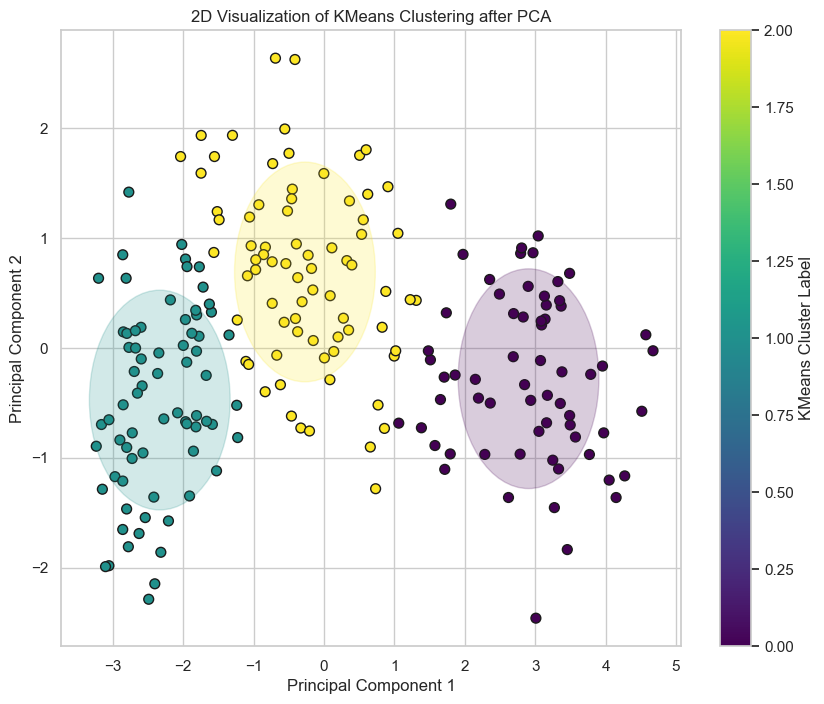

In [82]:
n_clusters = 3 
# Use KMeans for clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Plot the 2D scatter plot
plt.figure(figsize=(10, 8))

# Plot each data point colored by its cluster label
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolors='k')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of KMeans Clustering after PCA')

# Add a colorbar to show the cluster labels
colorbar = plt.colorbar(scatter, label='KMeans Cluster Label')

# Plotting fitting circles
for i, center in enumerate(kmeans.cluster_centers_):
    cluster_color = scatter.to_rgba(i)  # Extract correct color from scatter plot
    plot_circle(plt.gca(), center, cluster_color, f'Cluster {i + 1}')

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg:.4f}")

plt.show()

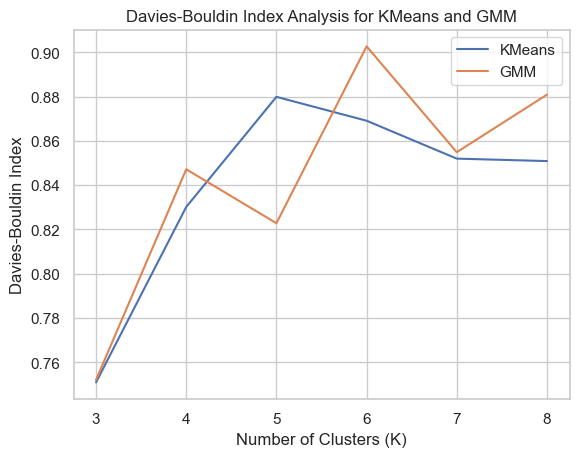

Davies-Bouldin Index for KMeans: 0.8509
Davies-Bouldin Index for GMM: 0.8809


In [83]:

# List to store the Davies-Bouldin Index values for KMeans
dbi_kmeans = []

# List to store the Davies-Bouldin Index values for GMM
dbi_gmm = []

# Range of different values of K to analyze
K = range(3, 9)  

# Iterate over K
for k in K:
    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    dbi_kmeans.append(davies_bouldin_score(X_pca, kmeans_labels))

    # GMM clustering
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_pca)
    dbi_gmm.append(davies_bouldin_score(X_pca, gmm_labels))

# Plotting the results
plt.plot(K, dbi_kmeans, label='KMeans')
plt.plot(K, dbi_gmm, label='GMM')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Analysis for KMeans and GMM')
plt.legend()
plt.show()

kmeans_labels = kmeans.fit_predict(X_pca)
gmm_labels = gmm.fit_predict(X_pca)

# Davies-Bouldin Index
db_index_kmeans = davies_bouldin_score(X_pca, kmeans_labels)
db_index_gmm = davies_bouldin_score(X_pca, gmm_labels)

print(f'Davies-Bouldin Index for KMeans: {db_index_kmeans:.4f}')
print(f'Davies-Bouldin Index for GMM: {db_index_gmm:.4f}')


## Conclusion for Primary evaluation Method


* Davies-Bouldin Index for KMeans: 0.8509
* Davies-Bouldin Index for GMM: 0.8809


* Silhouette Score for KMeans: 0.4746
* Silhouette Score for GMM: 0.4749


* elbow method n=4
* AIC/BIC      n=4

The evaluation of clustering methods reveals that the GMM potentially provides slightly better-defined clusters than KMeans (Wang et al., 2019), as inferred from the silhouette scores. Davies-Bouldin Index also exhibits similar results, while, the Elbow method and AIC/BIC pinpoint n=4 as the optimal cluster count causing cluster difference. Hence the choices may var the resulst. 

The silhouette score is particularly favored for its clear indication of cluster distinction, reinforcing its role as a significant factor in choosing the optimal number of clusters and in the overall decision-making process regarding clustering quality.

In [84]:

seeds.head()

area  perimeter  compactness  length  width  asymmetry  groove_length  \
0  15.26      14.84        0.871   5.763  3.312      2.221          5.220   
1  14.88      14.57        0.881   5.554  3.333      1.018          4.956   
2  14.29      14.09        0.905   5.291  3.337      2.699          4.825   
3  13.84      13.94        0.895   5.324  3.379      2.259          4.805   
4  16.14      14.99        0.903   5.658  3.562      1.355          5.175   

   kmeans_cluster  gmm_cluster  kmeans_cluster_standardized  \
0               3            3                            0   
1               0            3                            0   
2               0            3                            0   
3               0            3                            0   
4               3            0                            0   

   gmm_cluster_standardized  kmeans_cluster_pca  gmm_cluster_pca  
0                         3                   0                0  
1                         3                   0                0  
2                         1                   0                0  
3                         1                   0                0  
4                         3                   0                0

In [85]:
# Dropping unwanted columns to make df ready for upcoming process
columns_to_drop = [
    'kmeans_cluster',
    'gmm_cluster',
    'kmeans_cluster_standardized',
    'gmm_cluster_standardized',
    'kmeans_cluster_pca',
    'gmm_cluster_pca'
]

seeds = seeds.drop(columns=columns_to_drop)


In [86]:
seeds.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'groove_length'],
      dtype='object')

### Read Source dataset

In [87]:
try:
    # Attempt to read the file using a whitespace delimiter due to alignment issue in source dataset
    seeds_source = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

    # Assign column names as it is missing column names
    seeds_source.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'seed_type']

    # Display the DataFrame
    print(seeds_source)
except Exception as e:
    print(f"An error occurred: {e}")

      area  perimeter  compactness  length  width  asymmetry  groove_length  \
0    15.26      14.84       0.8710   5.763  3.312      2.221          5.220   
1    14.88      14.57       0.8811   5.554  3.333      1.018          4.956   
2    14.29      14.09       0.9050   5.291  3.337      2.699          4.825   
3    13.84      13.94       0.8955   5.324  3.379      2.259          4.805   
4    16.14      14.99       0.9034   5.658  3.562      1.355          5.175   
..     ...        ...          ...     ...    ...        ...            ...   
205  12.19      13.20       0.8783   5.137  2.981      3.631          4.870   
206  11.23      12.88       0.8511   5.140  2.795      4.325          5.003   
207  13.20      13.66       0.8883   5.236  3.232      8.315          5.056   
208  11.84      13.21       0.8521   5.175  2.836      3.598          5.044   
209  12.30      13.34       0.8684   5.243  2.974      5.637          5.063   

     seed_type  
0            1  
1            1  


In [88]:
seeds_source.head(10)

area  perimeter  compactness  length  width  asymmetry  groove_length  \
0  15.26      14.84       0.8710   5.763  3.312      2.221          5.220   
1  14.88      14.57       0.8811   5.554  3.333      1.018          4.956   
2  14.29      14.09       0.9050   5.291  3.337      2.699          4.825   
3  13.84      13.94       0.8955   5.324  3.379      2.259          4.805   
4  16.14      14.99       0.9034   5.658  3.562      1.355          5.175   
5  14.38      14.21       0.8951   5.386  3.312      2.462          4.956   
6  14.69      14.49       0.8799   5.563  3.259      3.586          5.219   
7  14.11      14.10       0.8911   5.420  3.302      2.700          5.000   
8  16.63      15.46       0.8747   6.053  3.465      2.040          5.877   
9  16.44      15.25       0.8880   5.884  3.505      1.969          5.533   

   seed_type  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  
9          1

In [89]:
seeds_source['seed_type'].unique()

array([1, 2, 3], dtype=int64)

## Comparison between given and source Dataset

In [90]:
# Compare the column names
if list(seeds.columns) != list(seeds_source.columns):
    print("Column names are different.")

# Check for missing or additional rows
if len(seeds) != len(seeds_source):
    print("Number of rows is different.")

# Check for missing or additional columns
missing_columns = set(seeds.columns) - set(seeds_source.columns)
if missing_columns:
    print(f"Missing columns in the source dataset: {missing_columns}")

extra_columns = set(seeds_source.columns) - set(seeds.columns)
if extra_columns:
    print(f"Extra columns in the source dataset: {extra_columns}")


Column names are different.
Extra columns in the source dataset: {'seed_type'}


In [91]:
# Compare the values in the first 7 fields between seeds and seeds_source
for index, (row_seeds, row_source) in enumerate(zip(seeds.values, seeds_source.values), start=1):
    diff_indices = [i for i, (val_seeds, val_source) in enumerate(zip(row_seeds[:7], row_source[:7]), start=1) if val_seeds != val_source]

    if diff_indices:
        print(f"Differences in record {index} at indices {diff_indices}:")
        print(f"   Values in seeds: {row_seeds[:7]}")
        print(f"   Values in seeds_source: {row_source[:7]}")
        print()


Differences in record 2 at indices [3]:
   Values in seeds: [14.88  14.57   0.881  5.554  3.333  1.018  4.956]
   Values in seeds_source: [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]

Differences in record 4 at indices [3]:
   Values in seeds: [13.84  13.94   0.895  5.324  3.379  2.259  4.805]
   Values in seeds_source: [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]

Differences in record 5 at indices [3]:
   Values in seeds: [16.14  14.99   0.903  5.658  3.562  1.355  5.175]
   Values in seeds_source: [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]

Differences in record 6 at indices [3]:
   Values in seeds: [14.38  14.21   0.895  5.386  3.312  2.462  4.956]
   Values in seeds_source: [14.38   14.21    0.8951  5.386   3.312   2.462   4.956 ]

Differences in record 7 at indices [3]:
   Values in seeds: [14.69  14.49   0.88   5.563  3.259  3.586  5.219]
   Values in seeds_source: [14.69   14.49    0.8799  5.563   3.259   3.586   5.219 ]

Differences in 

In [92]:

# Round the "compactness" field in seeds_source to 3 decimal places
seeds_source['compactness'] = seeds_source['compactness'].apply(lambda x: round(x, 3))

# Compare the values in the first 7 fields between seeds and seeds_source (excluding 'seed_type')
for index, (row_seeds, row_source) in enumerate(zip(seeds.values, seeds_source.values), start=1):
    diff_indices = [i for i, (val_seeds, val_source) in enumerate(zip(row_seeds[:7], row_source[:7]), start=1) if val_seeds != val_source]

    if diff_indices:
        print(f"Differences in record {index} at indices {diff_indices}:")
        print(f"   Values in seeds: {row_seeds[:7]}")
        print(f"   Values in seeds_source: {row_source[:7]}")
        print()


Differences in record 23 at indices [6]:
   Values in seeds: [15.88  14.9    0.899  5.618  3.507  0.765  5.091]
   Values in seeds_source: [15.88   14.9     0.899   5.618   3.507   0.7651  5.091 ]

Differences in record 31 at indices [6]:
   Values in seeds: [13.16  13.82   0.866  5.454  2.975  0.855  5.056]
   Values in seeds_source: [13.16   13.82    0.866   5.454   2.975   0.8551  5.056 ]



#### Observation/Comments
Difference is mainly found in presence of additional Seed_type(target field) in source dataset , along with additional decimal digit in compactness and groove_length field which is neglible as it matches between both data upto 3 decimals

In [93]:
# Check for missing values in seeds_source
missing_values = seeds_source.isnull().sum()
print("Missing values in seeds_source:")
print(missing_values)


Missing values in seeds_source:
area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
seed_type        0
dtype: int64


## Data Visualization

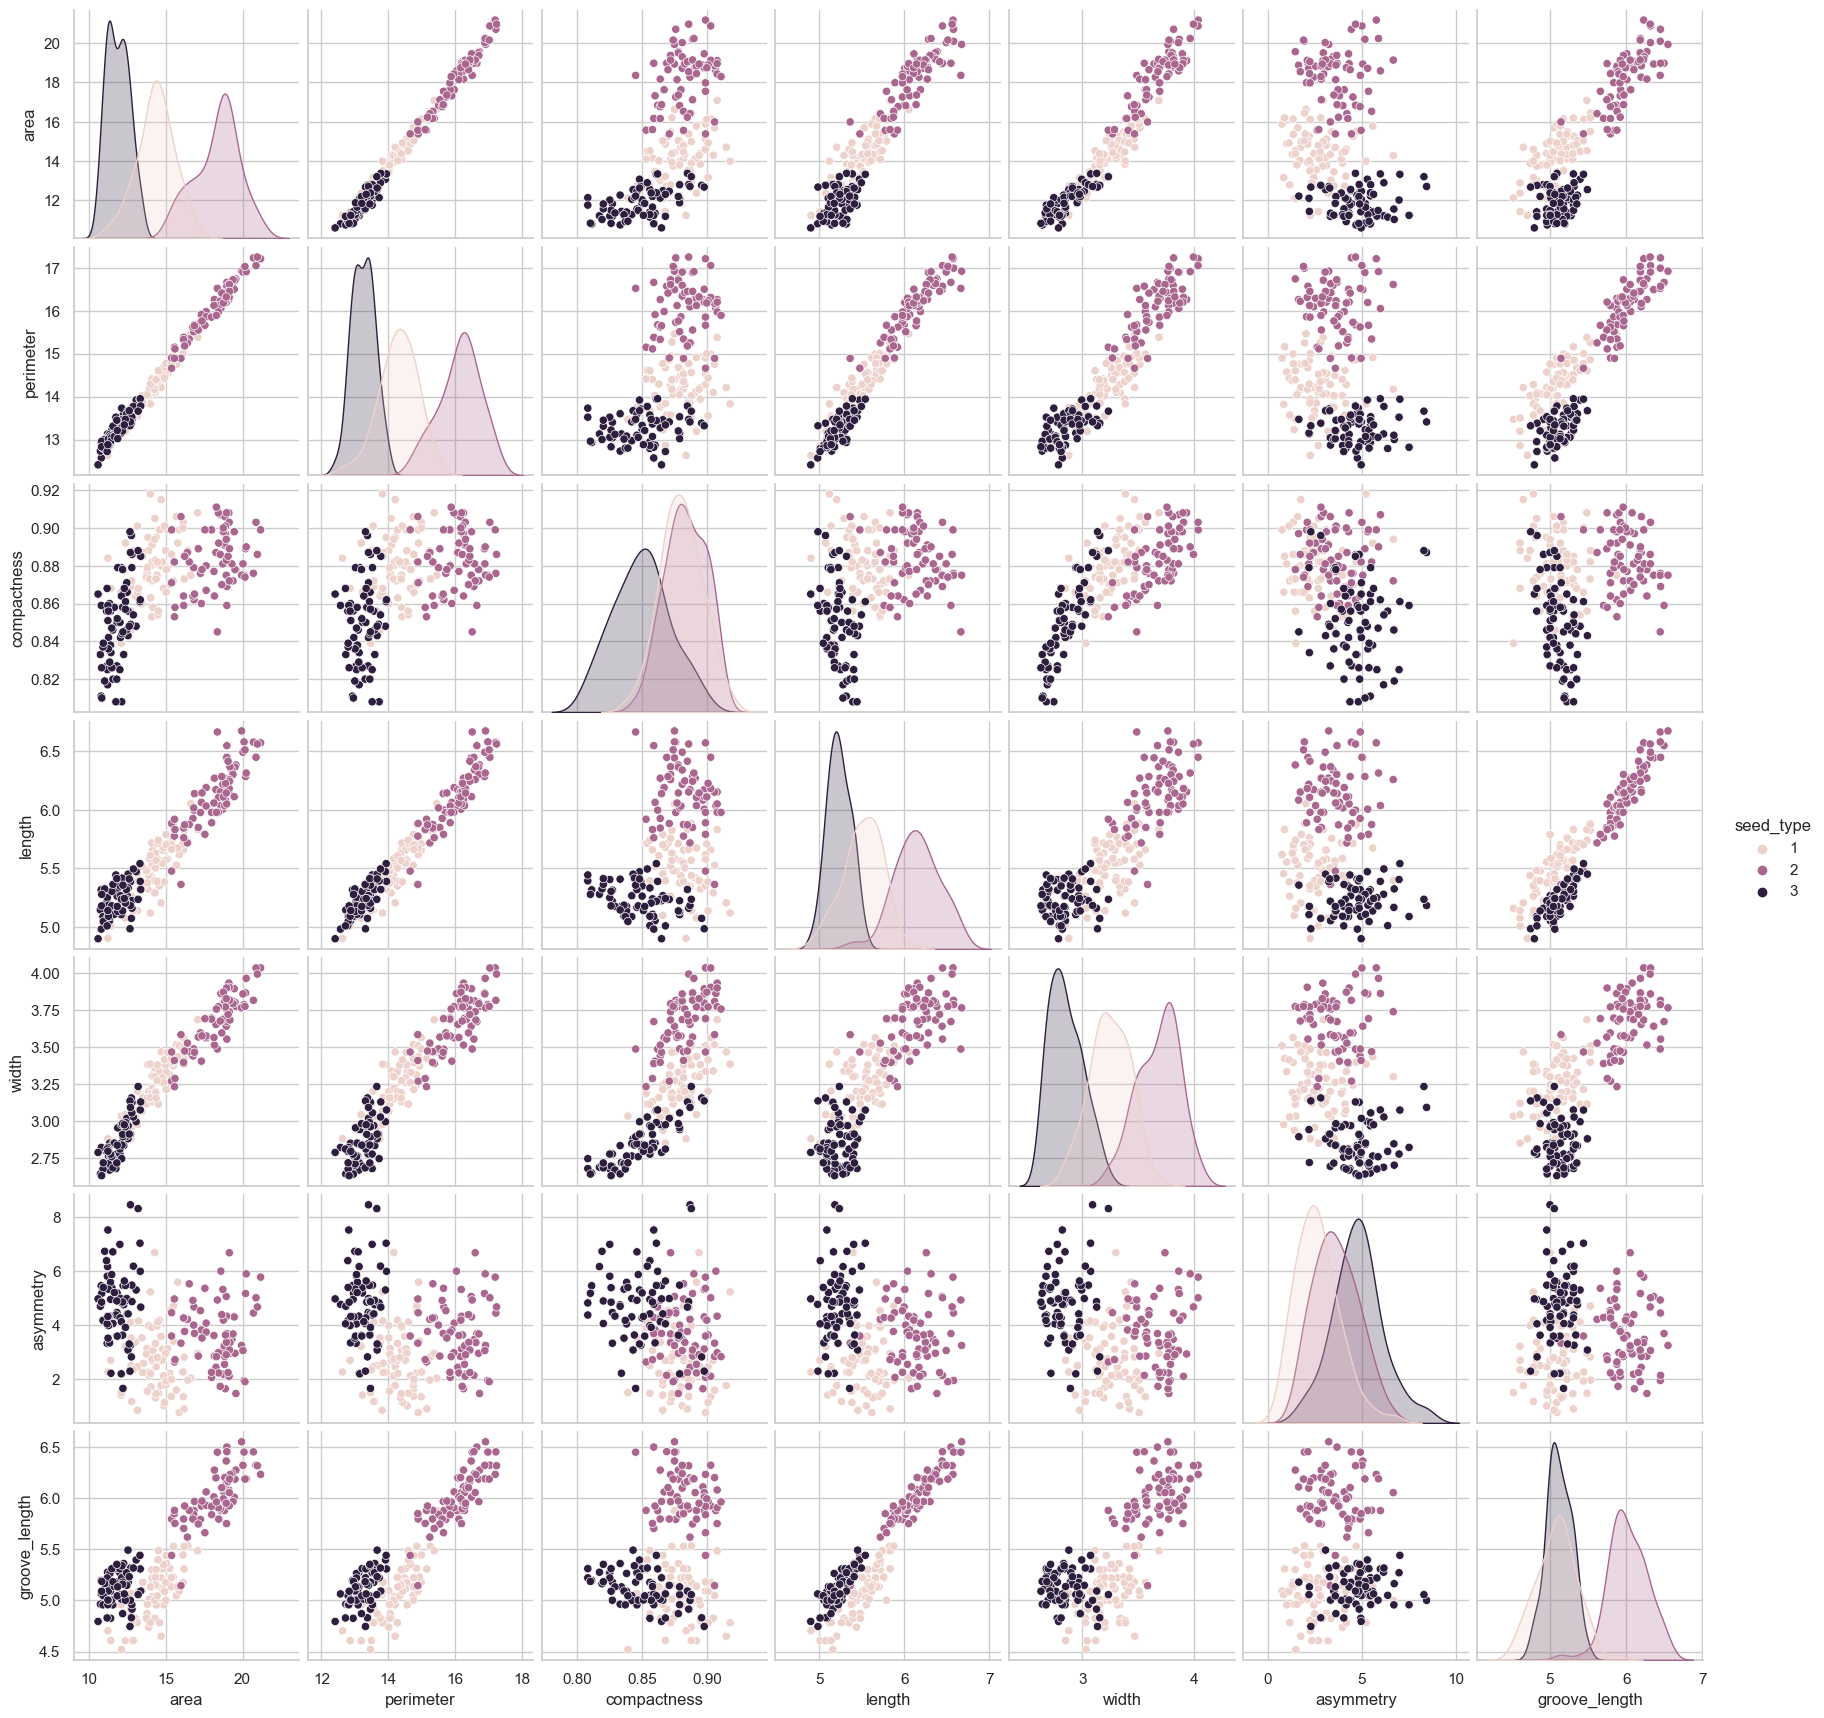

In [94]:

# Pairplot for seeds_source
sns.pairplot(seeds_source, hue='seed_type')
plt.show()


## Re-evalution of existing clustered data based on new data analysis

Given source dataset has cluster seperation, Rand Index is selected as re-evaluation method as this method performs evaluation when cluster is known. A key strength is it can compare clusterings with a different number of clusters without any adjustment, making it versatile for various clustering scenarios. The Rand score ranges from 0 to 1, with 1 indicating that the clusterings are identical and 0 indicating that there is no agreement between the clusterings.

The Adjusted Rand Index (ARI) is a variation of the Rand Index that adjusts for chance, normalizing the score such that random clusterings have an expected ARI close to 0. This is particularly useful when comparing clusterings of different sizes. In the given scenario, KMeans is slightly preferred over GMM based on these metrics, indicating its clustering structure may align more accurately with the known true labels.

In [95]:

true_labels = seeds_source['seed_type']

# Evaluating KMeans
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
rand_kmeans = rand_score(true_labels, kmeans_labels)
print(f'Adjusted Rand Index for KMeans: {ari_kmeans}')
print(f'Rand score for KMeans:\n{rand_kmeans}\n')

# Evaluating GMM
ari_gmm = adjusted_rand_score(true_labels, gmm_labels)
rand_gmm = rand_score(true_labels, gmm_labels)

print(f'Adjusted Rand Index for GMM: {ari_gmm}')
print(f'Confusion Matrix for GMM:\n{rand_gmm}\n')


Adjusted Rand Index for KMeans: 0.3029602399035323
Rand score for KMeans:
0.7406242879927091

Adjusted Rand Index for GMM: 0.30980520767383907
Confusion Matrix for GMM:
0.7425837320574162



## Secondary Model Implementation

### Implementation and evaluation of classification Method

### Classification Method
Classification approach is taken as the source dataset has class labels and this is a supervised learning methodology. Logistic Regression and Support Vector Machines (SVM) are selected due to their suitability for robustness in classification (Mohan et al., 2020). 
* Logistic Regression
* Supper Vector Machine

### Logistic Regression
A go-to method for binary classification problems, logistic regression models the probability of a default class using a logistic function. It's favored for its interpretability and the provision of odds ratios for predictors.

### Support Vector Machine
SVM is adept at handling both linear and nonlinear data. It creates hyperplanes in high-dimensional space for classification, focusing on maximizing the margin between different classes and relying on support vectors for boundary formation.

Results for Standardized, PCA transformed Logistic Regression:

Confusion Matrix:


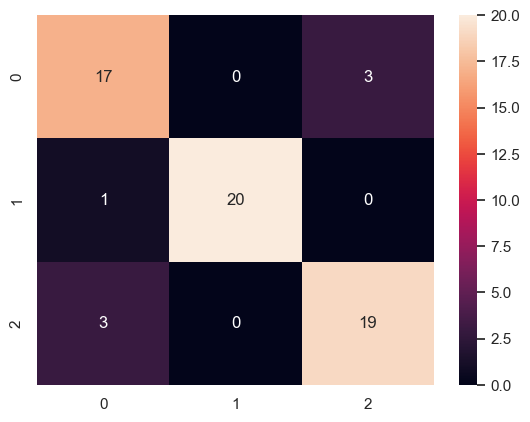


Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Accuracy Score: 0.8888888888888888
-----------------------------------------------------

Results for Standardized, PCA transformed Support Vector Machine:

Confusion Matrix:


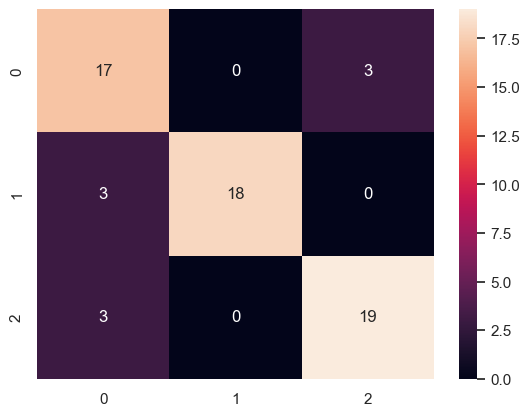


Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       1.00      0.86      0.92        21
           3       0.86      0.86      0.86        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63

Accuracy Score: 0.8571428571428571
-----------------------------------------------------



In [96]:

# Standardize and apply PCA transformation
scaler = StandardScaler()
X_standardized = scaler.fit_transform(seeds_source.drop('seed_type', axis=1))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, seeds_source['seed_type'], test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Support Vector Machine
svm = SVC(kernel='rbf', C=1E06) 
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluation
def evaluate_model(predictions, model_name):
    print(f"Results for Standardized, PCA transformed {model_name}:\n")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
    plt.show()
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("-----------------------------------------------------\n")

evaluate_model(logreg_pred, "Logistic Regression")
evaluate_model(svm_pred, "Support Vector Machine")


Results for Logistic Regression:

Confusion Matrix:


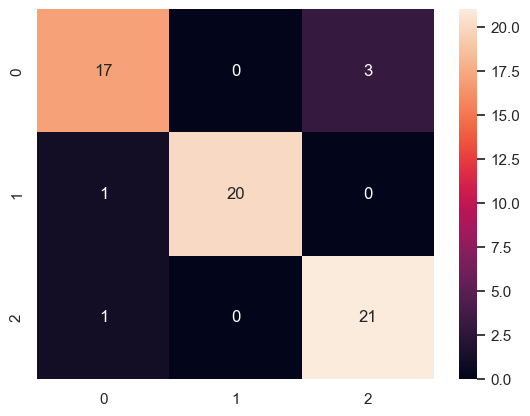


Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.95      0.98        21
           3       0.88      0.95      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Accuracy Score: 0.9206349206349206
-----------------------------------------------------

Results for Support Vector Machine:

Confusion Matrix:


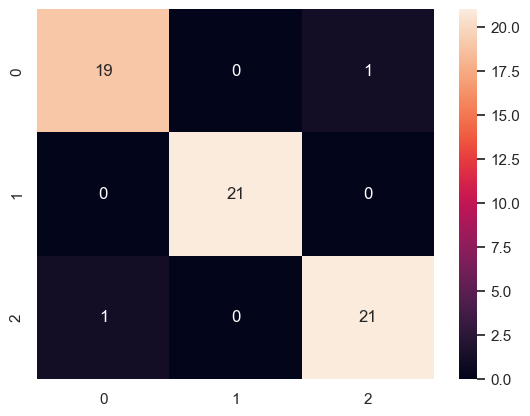


Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        22

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

Accuracy Score: 0.9682539682539683
-----------------------------------------------------



In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Splitting the data into features and target
X = seeds_source.drop('seed_type', axis=1)
y = seeds_source['seed_type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Support Vector Machine
svm = SVC(kernel='rbf', C=1E06) 
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluation
def evaluate_model(predictions, model_name):
    print(f"Results for {model_name}:\n")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
    plt.show()
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("-----------------------------------------------------\n")

evaluate_model(logreg_pred, "Logistic Regression")
evaluate_model(svm_pred, "Support Vector Machine")


#### Observation/Comments
Non-transformed Support Vector Machine (SVM) emerges as the superior method due to its highest accuracy score, making it the preferred choice for scenarios where maximum classification accuracy is paramount. While PCA-transformed models like Logistic Regression and SVM maintain high performance, the non-transformed SVM stands out for its effectiveness in handling the original dataset without the need for dimensionality reduction.

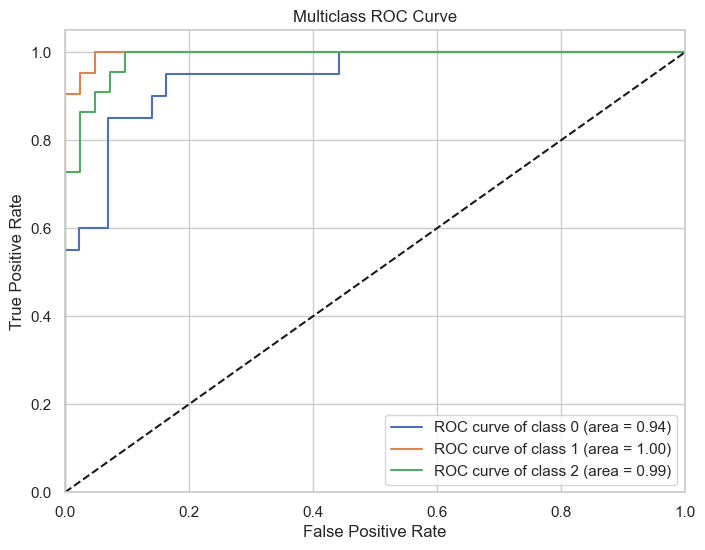

In [98]:

# Binarize the output classes for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Calculate the number of classes by the shape of y_test after binarization
n_classes = y_test_binarized.shape[1]

# Use the OneVsRest strategy to compute the ROC curve and ROC AUC for each class
classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
classifier.fit(X_train, y_train)

# Get the decision function or probability predictions
y_score = classifier.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for the multiclass problem
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Conclusion for Secondary Evaluation Model


For the SVM classification model, the high AUC values demonstrate its exceptional class-specific predictive power, while the accuracy score nearing 97% confirms its overall reliability across classes. Given the balanced nature of the dataset and equal misclassification costs, accuracy proves to be a more practical and comprehensive measure, making it the better choice for summarizing the model's performance succinctly. ROC results also states similar reliable classifier method reflecting that analysis choices are providing fairly similar results , but accuracy is chosen due to its overall efficiency.
